# Load for XZ YZ slicing

In [1]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import imageio
import re
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
from scipy.interpolate import interp2d,RegularGridInterpolator
from random import random
from tqdm import tqdm

In [966]:
import sys
sys.executable

'/Users/asears/opt/anaconda3/bin/python'

In [2]:
filen = glob.glob('HUVEC\ Tubulin\ AD\ 0.7\ ZStack\ Decon\ cellSens.export/')
filen = glob.glob('../results/Intensity_*_CH_blankoverlay.png')
print(len(filen))

30


(1024, 1024, 3)


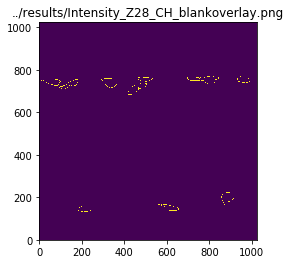

(1024, 1024, 3)


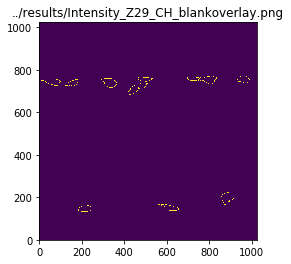

(1024, 1024, 3)


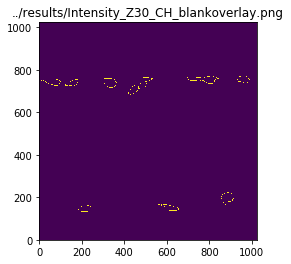

(1024, 1024, 3)


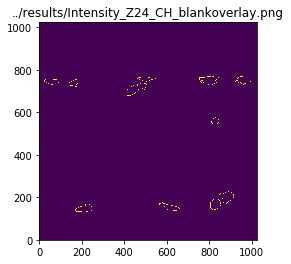

(1024, 1024, 3)


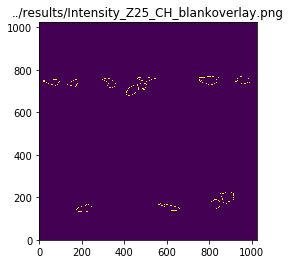

(1024, 1024, 3)


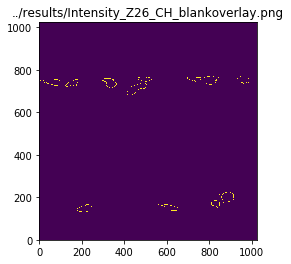

(1024, 1024, 3)


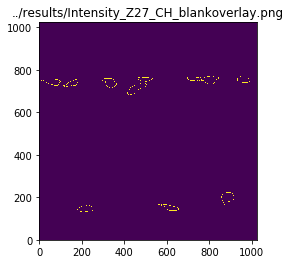

(1024, 1024, 3)


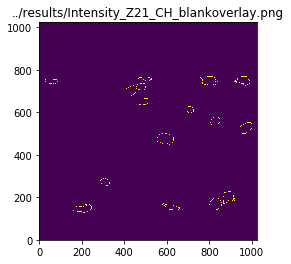

(1024, 1024, 3)


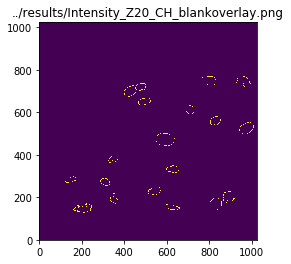

(1024, 1024, 3)


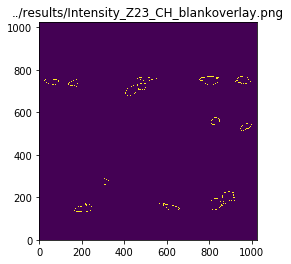

(1024, 1024, 3)


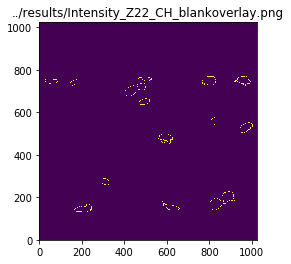

(1024, 1024, 3)


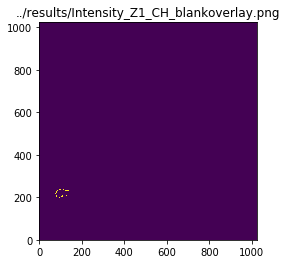

(1024, 1024, 3)


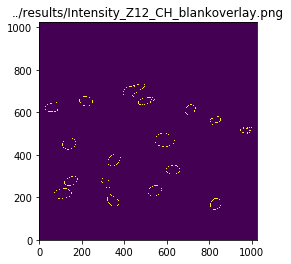

(1024, 1024, 3)


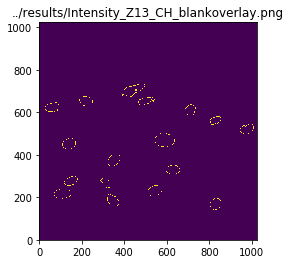

(800, 800, 3)


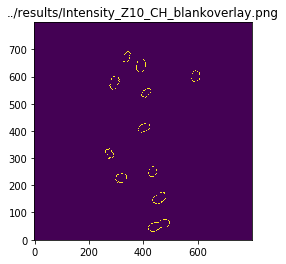

(1024, 1024, 3)


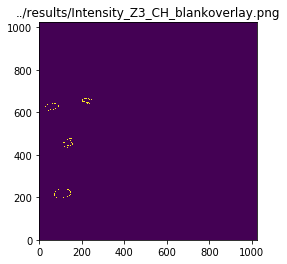

(1024, 1024, 3)


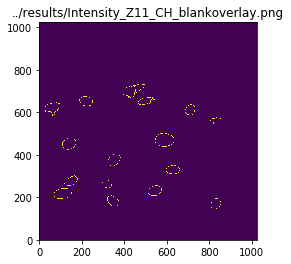

(1024, 1024, 3)


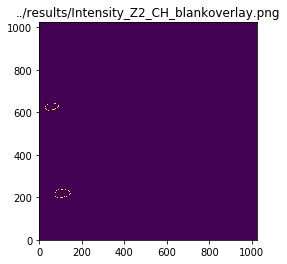

(1024, 1024, 3)


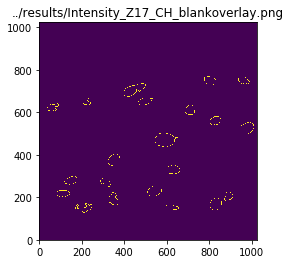

(1024, 1024, 3)


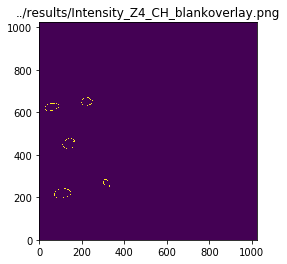

(1024, 1024, 3)


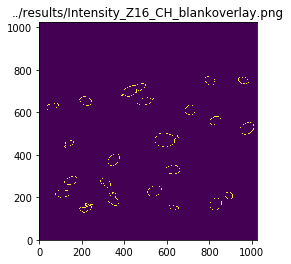

(1024, 1024, 3)


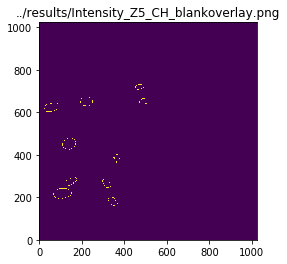

(1024, 1024, 3)


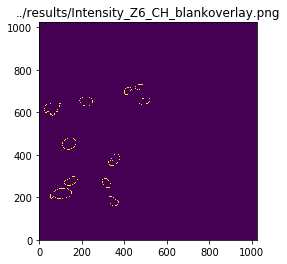

(1024, 1024, 3)


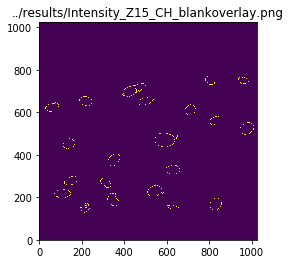

(1024, 1024, 3)


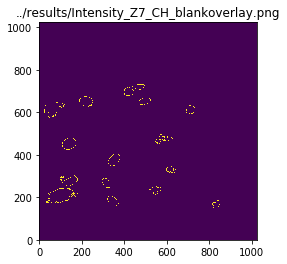

(1024, 1024, 3)


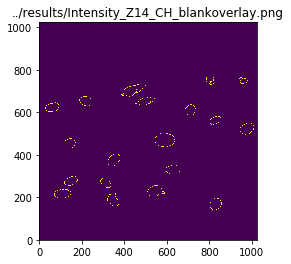

(1024, 1024, 3)


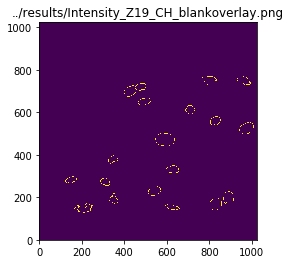

(1024, 1024, 3)


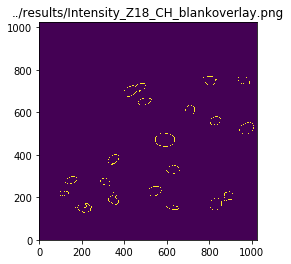

(1024, 1024, 3)


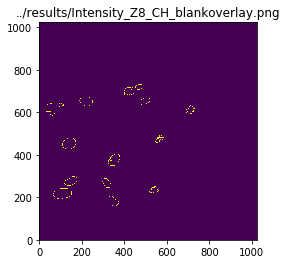

(1024, 1024, 3)


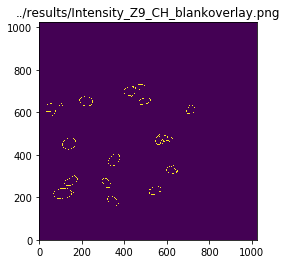

In [3]:
for f in filen:
    foo = imageio.imread(f)
    print(np.shape(foo))
    plt.imshow(foo[:,:,0], origin='lower')
    plt.title(f)
    plt.show()


In [4]:
h5data_filen = '../results/DefaultOUT__1.h5'
hdata = h5py.File(h5data_filen,'r')

for _ in hdata['FileList']:
    print(_)
    
for _ in hdata['Measurements']:
    print(hdata['Measurements'][_]['Image'].keys())

Default
<KeysViewHDF5 ['Channel_raw_data', 'Count_IdentifyPrimaryObjects', 'ExecutionTime_01Images', 'ExecutionTime_02Metadata', 'ExecutionTime_03NamesAndTypes', 'ExecutionTime_04Groups', 'ExecutionTime_05ColorToGray', 'ExecutionTime_06IdentifyPrimaryObjects', 'ExecutionTime_07OverlayOutlines', 'ExecutionTime_08OverlayOutlines', 'ExecutionTime_09OverlayOutlines', 'ExecutionTime_10SaveCroppedObjects', 'FileName_raw_data', 'Frame_raw_data', 'Group_Index', 'Group_Number', 'Height_raw_data', 'ImageNumber', 'ImageSet_ImageSet', 'MD5Digest_raw_data', 'Metadata_FileLocation', 'Metadata_Frame', 'Metadata_Series', 'ModuleError_01Images', 'ModuleError_02Metadata', 'ModuleError_03NamesAndTypes', 'ModuleError_04Groups', 'ModuleError_05ColorToGray', 'ModuleError_06IdentifyPrimaryObjects', 'ModuleError_07OverlayOutlines', 'ModuleError_08OverlayOutlines', 'ModuleError_09OverlayOutlines', 'ModuleError_10SaveCroppedObjects', 'PathName_raw_data', 'ProcessingStatus', 'Scaling_raw_data', 'Series_raw_data'

In [5]:
filen_orig = glob.glob('HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/*.png')
filen_orig = sorted(filen_orig, key=lambda x: int(x.split('/')[-1].split('_Z')[-1].split('_')[0]))
print(len(filen_orig))
for f in filen_orig:
    print(f.split('/')[-1].split('_Z')[-1].split('_')[0])

26
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


(800, 800, 3) 1


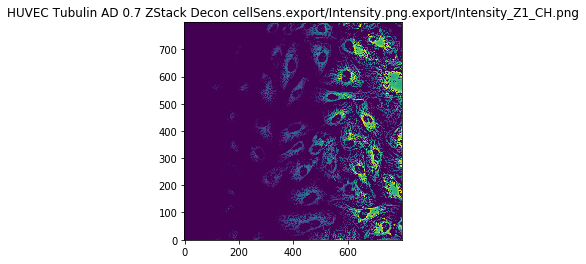

(800, 800, 3) 2


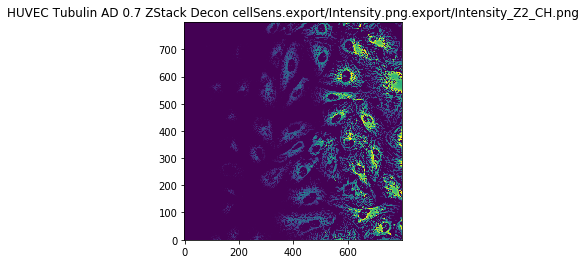

(800, 800, 3) 3


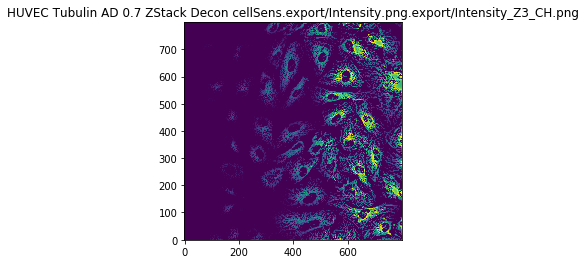

(800, 800, 3) 4


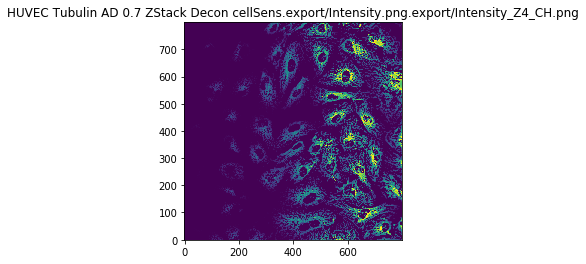

(800, 800, 3) 5


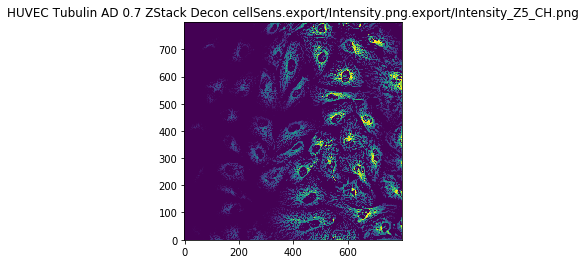

(800, 800, 3) 6


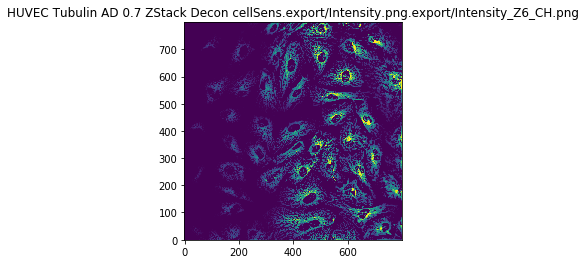

(800, 800, 3) 7


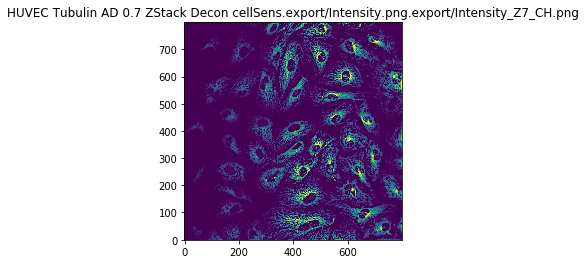

(800, 800, 3) 8


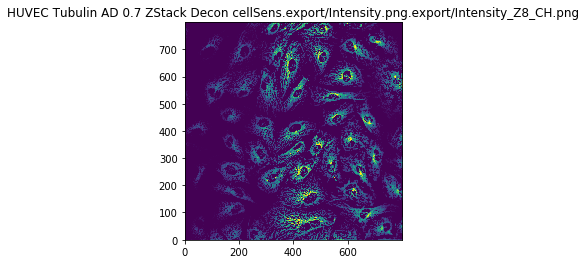

(800, 800, 3) 9


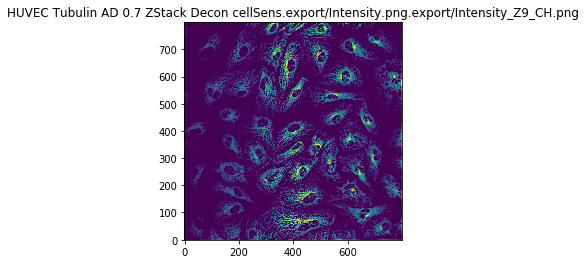

(800, 800, 3) 10


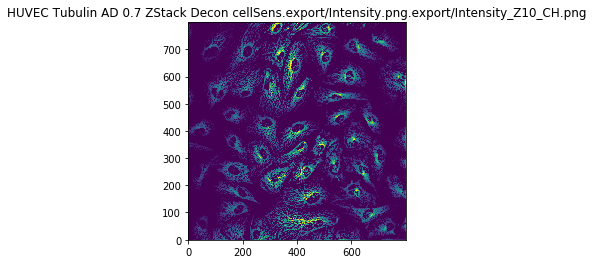

(800, 800, 3) 11


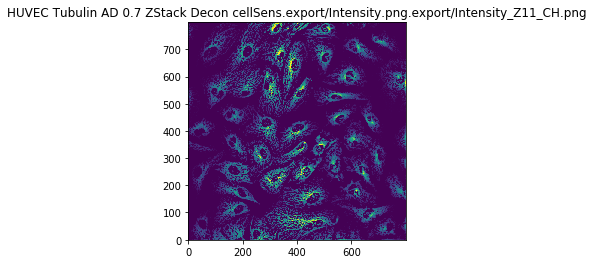

(800, 800, 3) 12


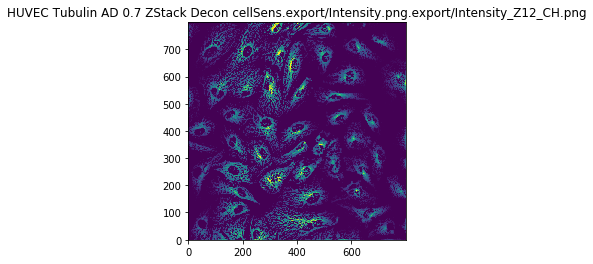

(800, 800, 3) 13


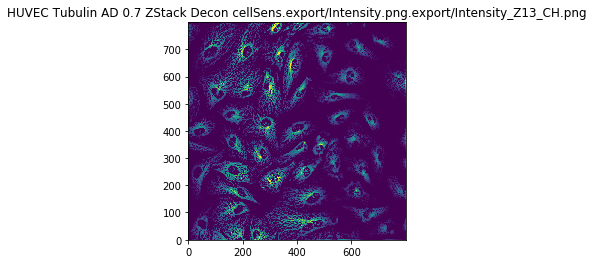

(800, 800, 3) 14


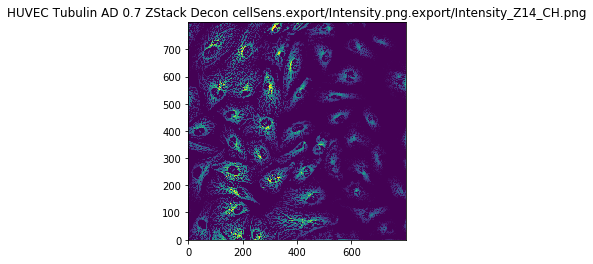

(800, 800, 3) 15


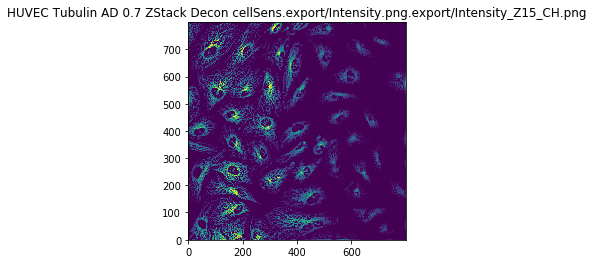

(800, 800, 3) 16


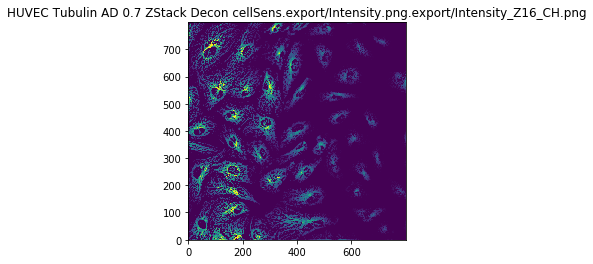

(800, 800, 3) 17


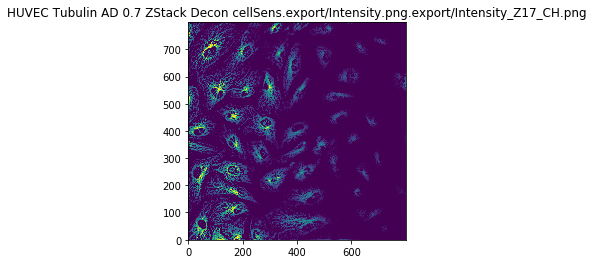

(800, 800, 3) 18


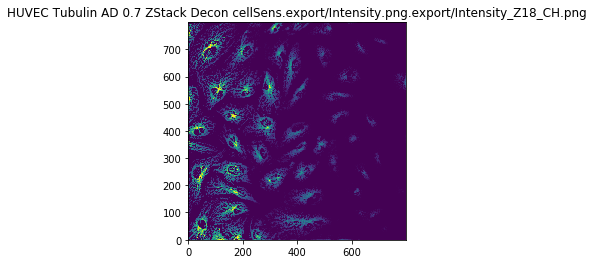

(800, 800, 3) 19


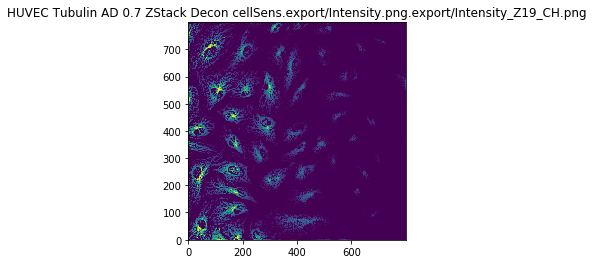

(800, 800, 3) 20


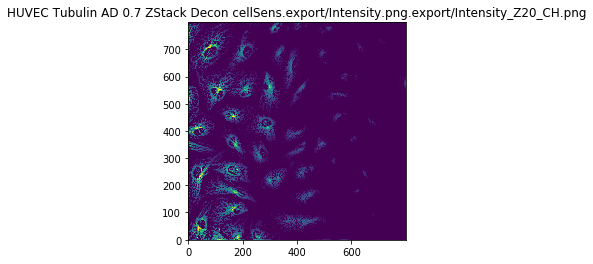

(800, 800, 3) 21


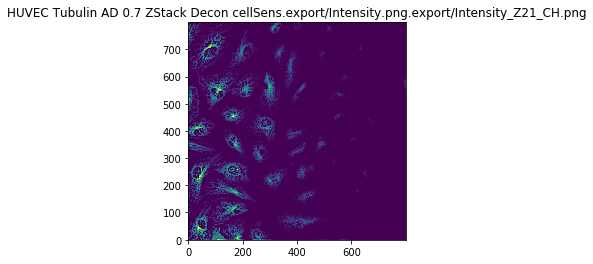

(800, 800, 3) 22


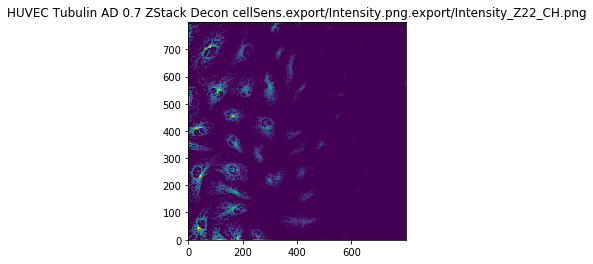

(800, 800, 3) 23


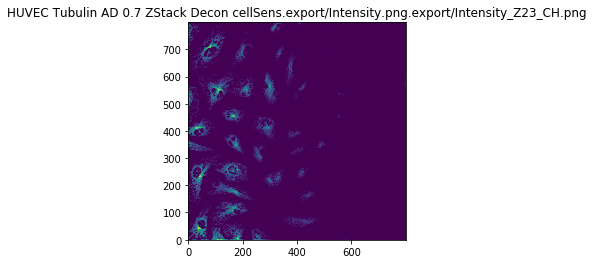

(800, 800, 3) 24


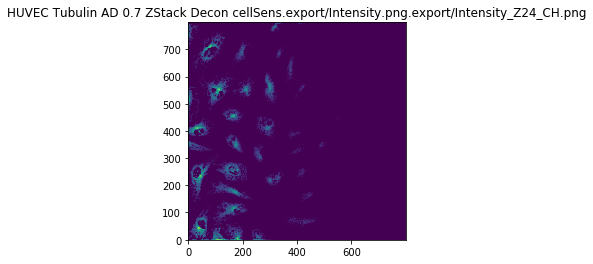

(800, 800, 3) 25


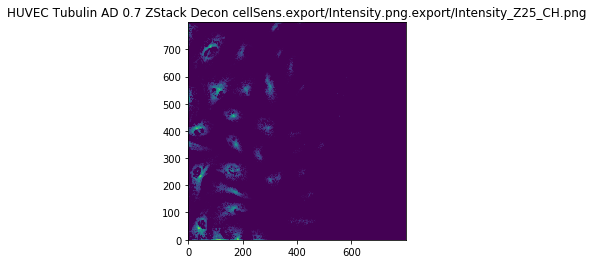

(800, 800, 3) 26


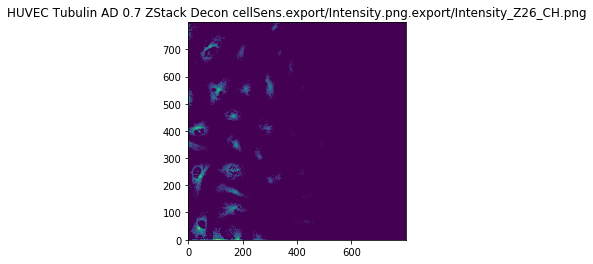

In [58]:
all_orig = {}
all_orig_cyto = {}
for f in filen_orig:
    fn =  int(f.split('/')[-1].split('_Z')[-1].split('_')[0])
    foo = imageio.imread(f)
    print(np.shape(foo), fn)
    plt.imshow(foo[:,:,2], origin='lower')
    all_orig[fn] = foo[:,:,2]
    all_orig_cyto[fn] = foo[:,:,1]

    plt.title(f)
    plt.show()


In [7]:
filen_masks = glob.glob('../results/objects/Nucleus_*.png')
print(len(filen_masks))

41


(800, 800)


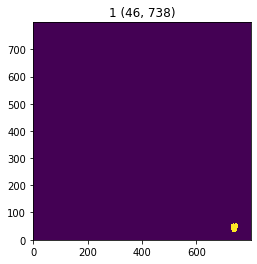

(800, 800)


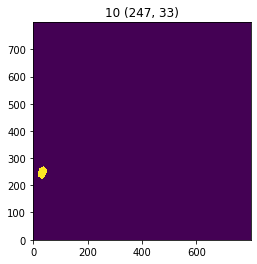

(800, 800)


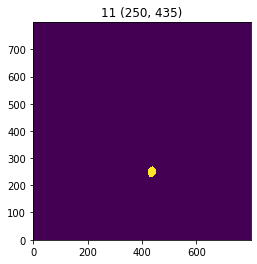

(800, 800)


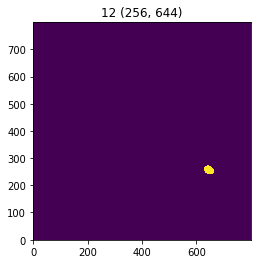

(800, 800)


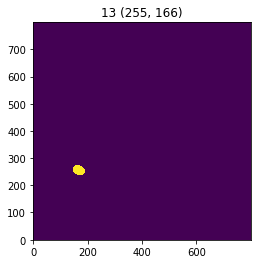

(800, 800)


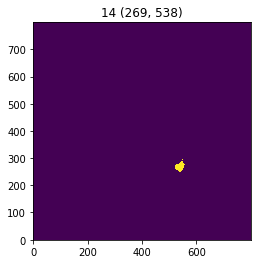

(800, 800)


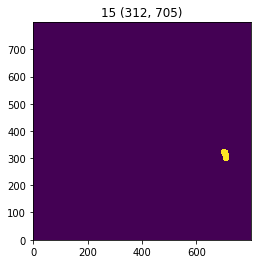

(800, 800)


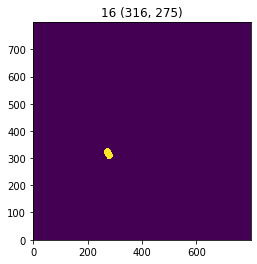

(800, 800)


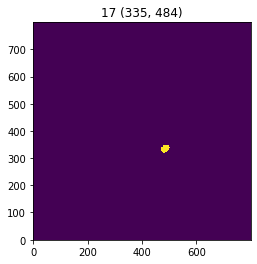

(800, 800)


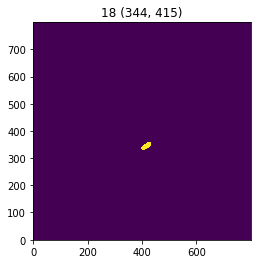

(800, 800)


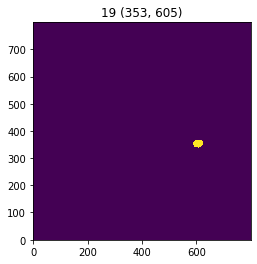

(800, 800)


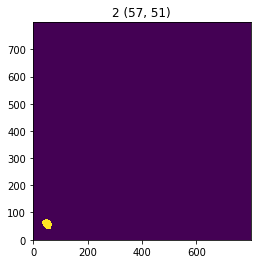

(800, 800)


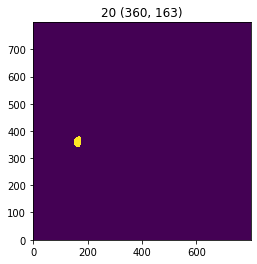

(800, 800)


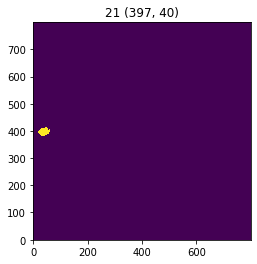

(800, 800)


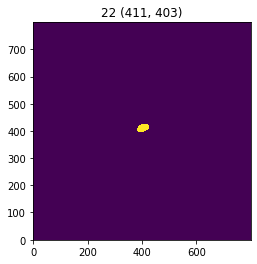

(800, 800)


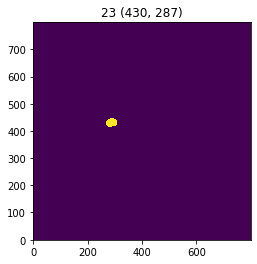

(800, 800)


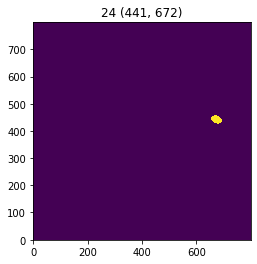

(800, 800)


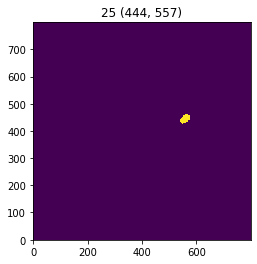

(800, 800)


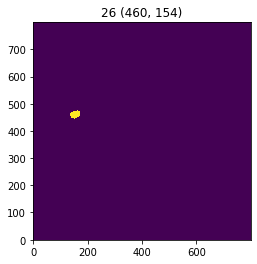

(800, 800)


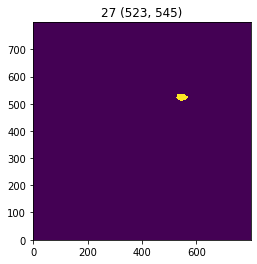

(800, 800)


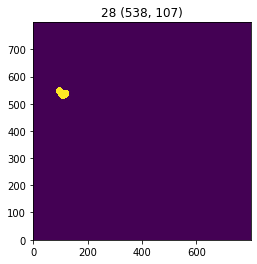

(800, 800)


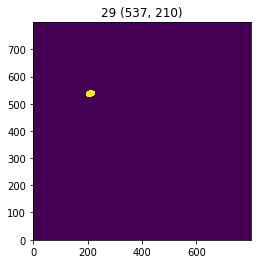

(800, 800)


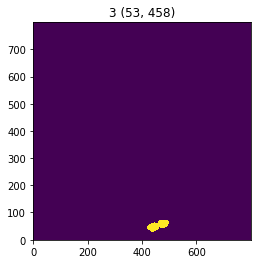

(800, 800)


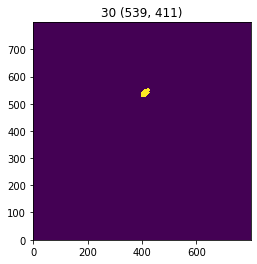

(800, 800)


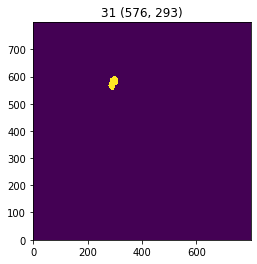

(800, 800)


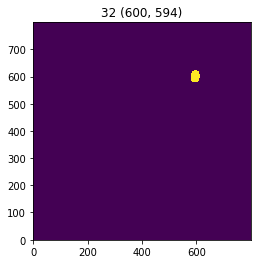

(800, 800)


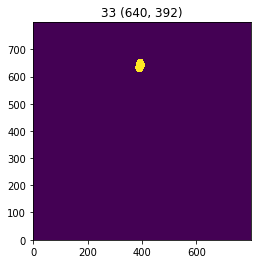

(800, 800)


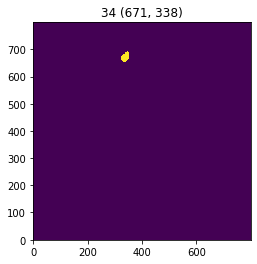

(800, 800)


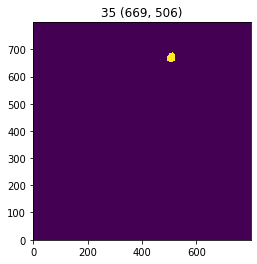

(800, 800)


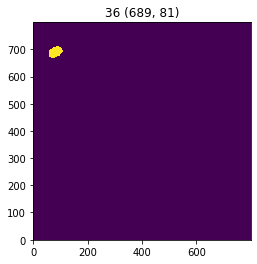

(800, 800)


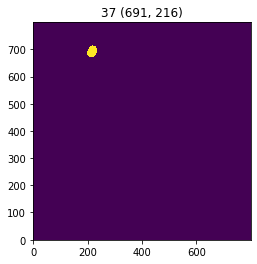

(800, 800)


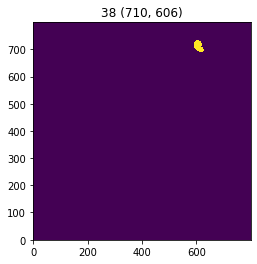

(800, 800)


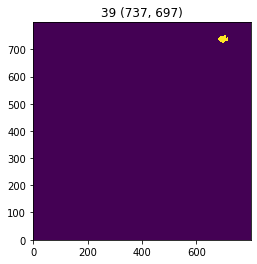

(800, 800)


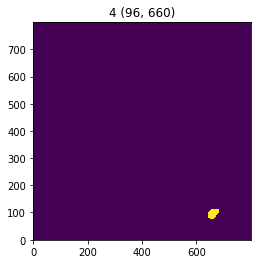

(800, 800)


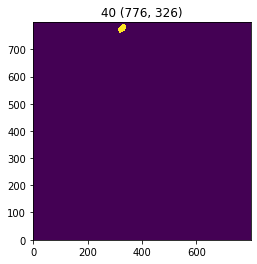

(800, 800)


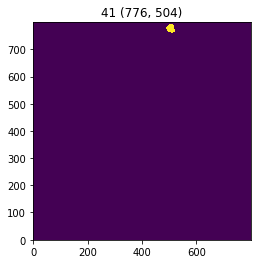

(800, 800)


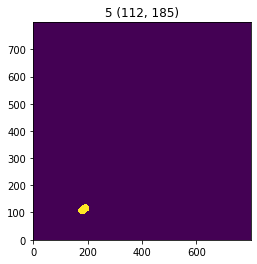

(800, 800)


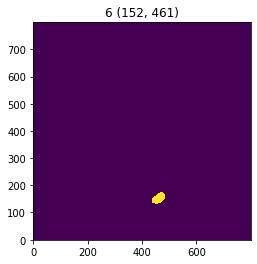

(800, 800)


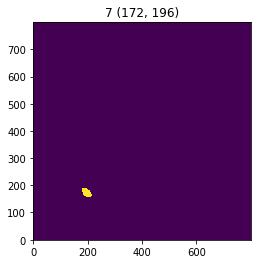

(800, 800)


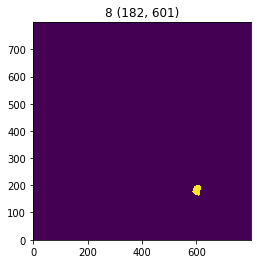

(800, 800)


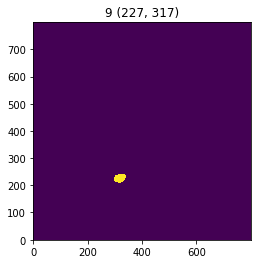

In [8]:
obj_masks = {}
for f in sorted(filen_masks):
    obj_n = int(f.split('_')[-1].split('.')[0])
    foo = imageio.imread(f)
    print(np.shape(foo))
    plt.imshow(foo[:,:], origin='lower')
    obj_masks[obj_n] = foo
    cx, cy = center_of_mass(foo)
    plt.title(str(obj_n) + ' (%d, %d)' % (int(cx), int(cy)))
    plt.show()    

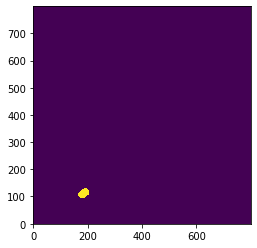

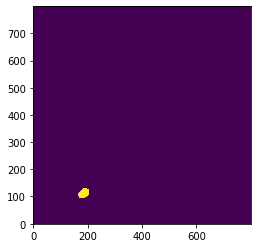

In [9]:
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
plt.imshow(obj_masks[5], origin='lower')
plt.show()
plt.imshow(binary_dilation(obj_masks[5]), origin='lower')
# struct2 = ndimage.generate_binary_structure(2, 2)

312 705


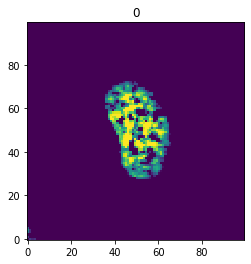

312 705


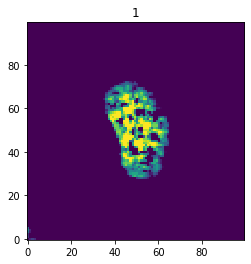

312 705


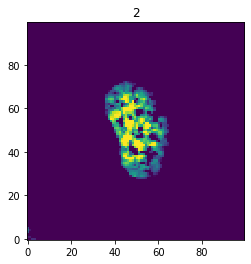

312 705


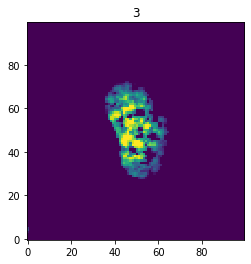

312 705


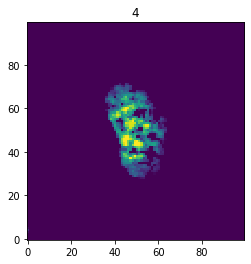

312 705


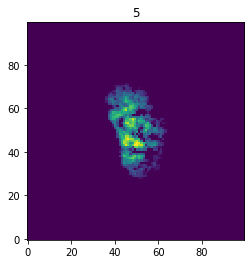

312 705


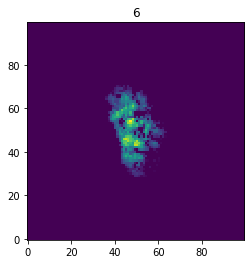

312 705


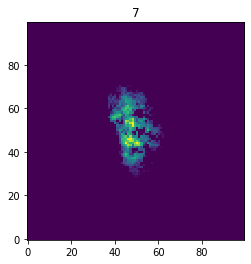

312 705


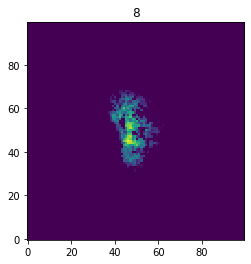

312 705


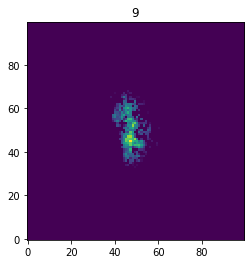

312 705


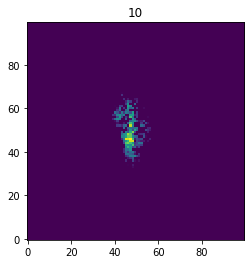

312 705


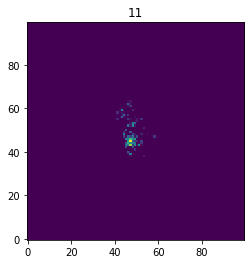

312 705


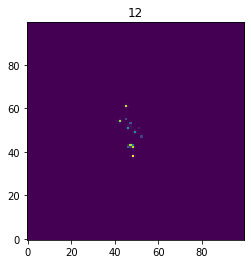

312 705


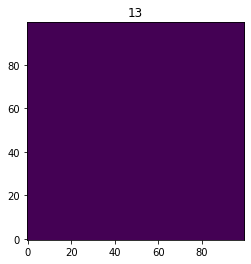

312 705


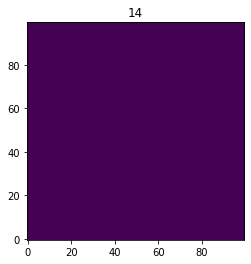

312 705


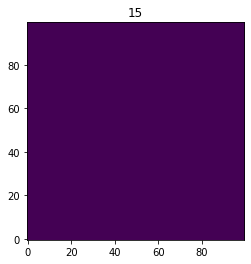

312 705


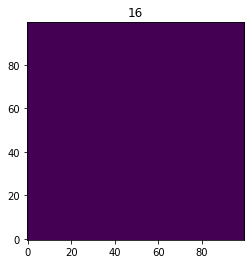

312 705


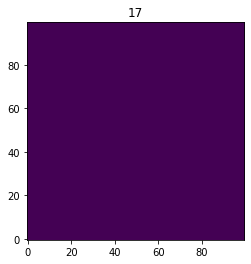

312 705


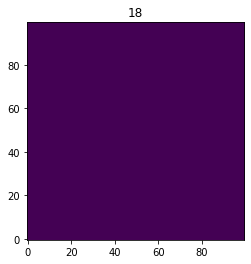

312 705


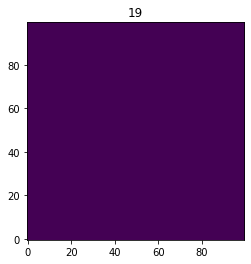

312 705


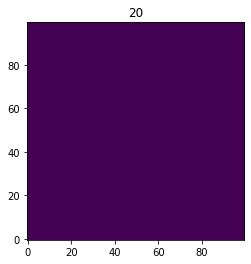

312 705


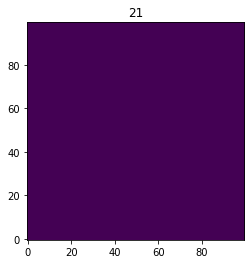

312 705


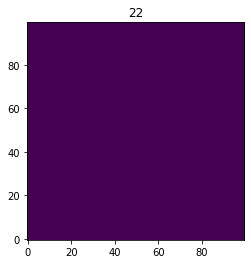

312 705


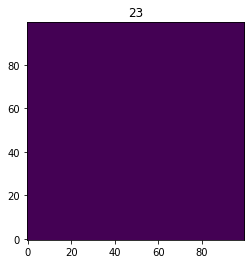

312 705


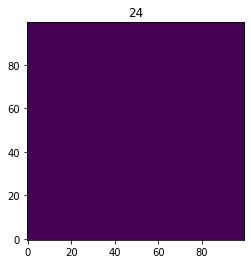

312 705


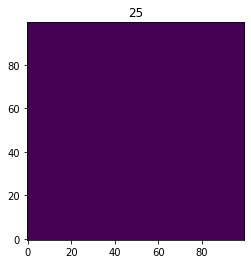

In [10]:
# plt.imshow(obj_masks[5]*all_orig[5])
center_of_mass(obj_masks[5])
def do_crop(img, mask, centroid=None, edge=10):
    if centroid is None:
        cx, cy = center_of_mass(mask)
        cx = int(cx)
        cy = int(cy)
        print(cx,cy)
    return img[cx-edge//2:cx+edge//2,cy-edge//2:cy+edge//2]

cropped_stack = []
for n in range(len(all_orig)):
    
    this_layer = do_crop(all_orig[n+1],obj_masks[15], edge=100)
    cropped_stack.append(this_layer)
    plt.imshow(this_layer, origin='lower')
    plt.title(n)
    plt.show()
cropped_stack = np.log10(np.array(cropped_stack).transpose(1,2,0)+1e-4)
    


In [11]:
# masksize = [imageio.imread(f) for f in ]
from mayavi import mlab
mlab.init_notebook()


Notebook initialized with ipy backend.


In [12]:
mlab.clf()
s = mlab.test_plot3d()
s
# mlab.show()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [13]:
import numpy as np
x, y, z = np.ogrid[-10:10:20j, -10:10:20j, -10:10:20j]
s = np.cos(x*y*z)**2/(x*y*z)

print(np.shape(s))
mlab.clf()
# mlab.pipeline.volume(mlab.pipeline.volume(mlab.pipeline.scalar_field(s)),vmin=-1,vmax=1)
# mlab.pipeline.scalar_field(cropped_stack)
src = mlab.pipeline.scalar_field(cropped_stack)
r = mlab.pipeline.volume(src,vmin=-4, vmax=1)
mlab.pipeline.image_plane_widget(src,
                            plane_orientation='z_axes',
                            slice_index=10,
                        )

(20, 20, 20)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [14]:
print(np.shape(cropped_stack))

(100, 100, 26)


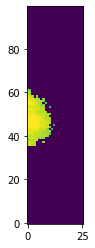

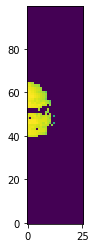

In [15]:
plt.imshow(cropped_stack[60,:,:], origin='lower')
plt.show()
plt.imshow(cropped_stack[50,:,:], origin='lower')

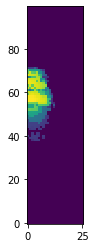

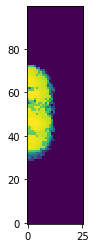

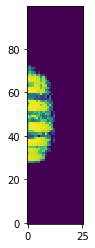

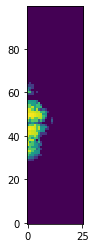

In [16]:
plt.imshow(np.mean(cropped_stack[:,38:43,:],1), origin='lower')
plt.show()
plt.imshow(np.mean(cropped_stack[:,43:48,:],1), origin='lower')
plt.show()
plt.imshow(np.mean(cropped_stack[:,48:53,:],1), origin='lower')
plt.show()
plt.imshow(np.mean(cropped_stack[:,58:63,:],1), origin='lower')

## Cleaned up

In [17]:
# Load a directory of z slices into memory
def load_zslices(filestub, regexn=r'\d+', scale=(1/75.0, 1/75.0, 1), color=None):
    scale = (1,1,1) if scale is None else scale
    
    regex = re.compile(regexn)
    
    fnames = sorted(glob.glob(filestub),key=lambda x: int(regex.search(x.split('/')[-1]).group(0)))
    print('Found %d files --' % len(fnames), fnames[0])
    
    datacube = {}
    if color is not None:
        datacube['data'] = {n: imageio.imread(f)[:,:,color] for n,f in enumerate(fnames)}
    else:
        datacube['data'] = {n: imageio.imread(f)[:,:] for n,f in enumerate(fnames)}
    
    datacube['scale'] = scale
    datacube['x0'] = (0,0,0)
    
#     datacube['x'] = np.array(range(np.shape(datacube['data'][1])[0]))*scale[0]
#     datacube['y'] = np.array(range(np.shape(datacube['data'][1])[1]))*scale[1]
#     datacube['z'] = np.array(range(len(datacube['data'])))*scale[2]
    
    datacube['centroids'] = {n: center_of_mass(datacube['data'][n]) for n in datacube['data']}
    datacube['weights'] = {n: np.sum(datacube['data'][n]) for n in datacube['data']}

    
    
    return datacube
    
    
cellsens_zstack = load_zslices('HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/*.png', scale=(1,1,1), color=2)
cellsens_masks = load_zslices('../results/objects/Nucleus*.png', scale=(1,1,1))



Found 26 files -- HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/Intensity_Z1_CH.png
Found 41 files -- ../results/objects/Nucleus_1.png


In [18]:
# returns dict of 3D objects, which have all been clipped from the original slices
def clip_objects(slices, masks, buffer=100):
    
    def padded_selection(img, padding, center, sel):
        img = np.pad(img,padding)
        return img[center[0]+padding-sel//2:center[0]+padding+sel//2,center[1]+padding-sel//2:center[1]+padding+sel//2]
    
    objs = {}
    for n in masks['data']: # for each object
        cx, cy = masks['centroids'][n]
        cx, cy = int(cx), int(cy)
        
        
        
        objs[n] = {
            'n': n,
            'data': np.array([padded_selection(slices['data'][m], buffer, (cx,cy), buffer) for m in slices['data']]).transpose(1,2,0),
            'x0': (
                (cx-np.shape(masks['data'][1])[0]/2.0)*masks['scale'][0],
                (cy-np.shape(masks['data'][1])[1]/2.0)*masks['scale'][1],
                np.argmax(masks['weights'])),
            'centroid': (0,0), # x0 is absolute, centroid is relative?
            'scale': masks['scale']
        }
        objs[n]['weights'] = [np.sum(objs[n]['data'][:,:,m]) for m in slices['data']]

        # update nucleus center
        x0 = list(objs[n]['x0'])
        x0[2] = np.argmax(objs[n]['weights'])
        objs[n]['x0'] = x0
    
        x = np.linspace(objs[n]['x0'][0]-np.shape(objs[n]['data'])[0]*masks['scale'][0]/2.0,
             objs[n]['x0'][0]+np.shape(objs[n]['data'])[0]*masks['scale'][0]/2.0-1,
             np.shape(objs[n]['data'])[0])
#             objs[n]['data'].shape[0], dtype=int)

#         print(x)
#         print('ljasdf', objs[n]['x0'],x, objs[n]['data'].shape)
        y = np.linspace(objs[n]['x0'][1]-np.shape(objs[n]['data'])[1]*masks['scale'][1]/2.0,
             objs[n]['x0'][1]+np.shape(objs[n]['data'])[1]*masks['scale'][1]/2.0-1,
             np.shape(objs[n]['data'])[1])
        
#         print(objs[n]['data'].shape, x.shape, y.shape, masks['scale'])
#         print(x[0],x[-1],y[0],y[-1])
        xx, yy = np.meshgrid(x, y)
#         z = objs[n]['data']
#         f = interp2d(x, y, z, kind='linear')

#         print(objs[n]['data'][:,:,0].shape, x.shape, y.shape)
        objs[n]['extent'] = (x[0],x[-1],y[0],y[-1])
        objs[n]['imextent'] = (y[0],y[-1],x[0],x[-1])
        objs[n]['linear'] = [interp2d(x, y, objs[n]['data'][:,:,z], kind='linear', fill_value=0.0) for z in range(objs[n]['data'].shape[2])]
        
        z = np.arange(0, objs[n]['data'].shape[2])
        
#         data = f(*np.meshgrid(x, y, z, indexing='ij', sparse=True))
#         print('data shape:', objs[n]['data'].shape)
        objs[n]['linear3D'] = RegularGridInterpolator((x,y,z), objs[n]['data'], bounds_error=False, fill_value=0, method='linear')


    return objs

res = clip_objects(cellsens_zstack,cellsens_masks)


In [19]:
np.argmax(res[5]['weights'])

8

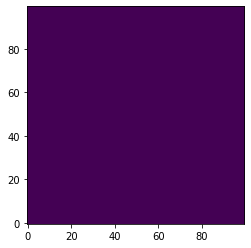

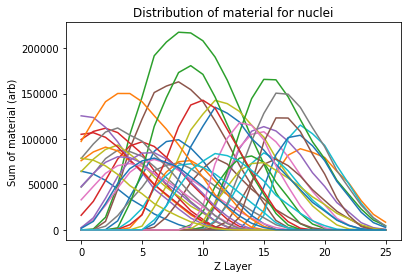

In [20]:
plt.imshow(res[0]['data'][:,:,15], origin='lower')
plt.show()
for _ in res:
    plt.plot(res[_]['weights'])
    
plt.title('Distribution of material for nuclei')
plt.xlabel('Z Layer')
plt.ylabel('Sum of material (arb)')
plt.show()
# plt.plot(res[0]['weights'])

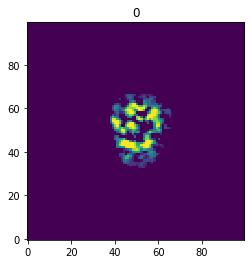

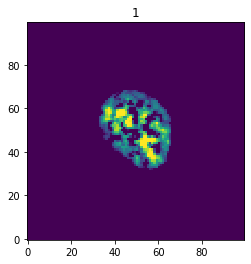

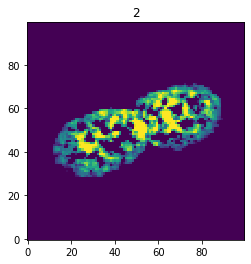

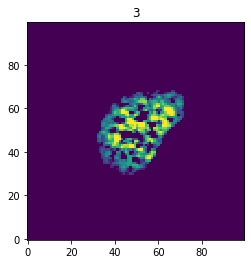

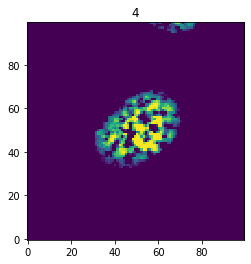

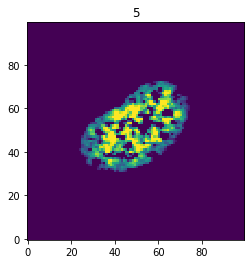

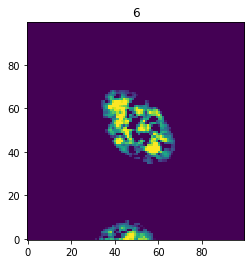

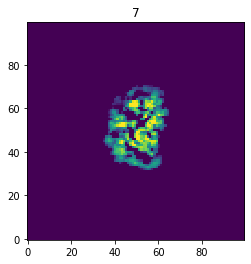

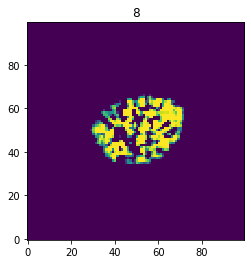

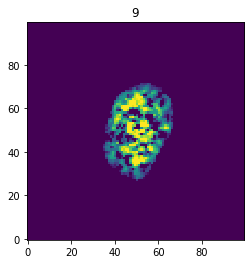

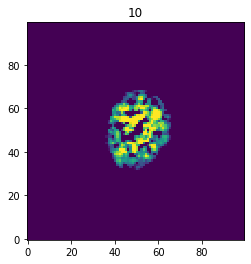

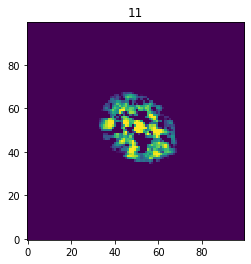

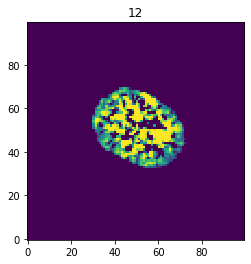

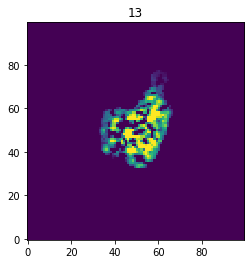

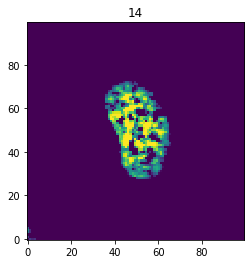

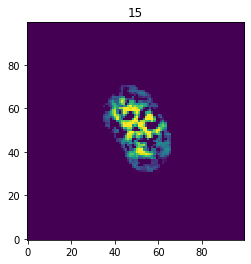

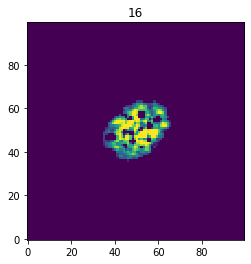

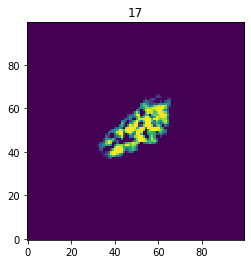

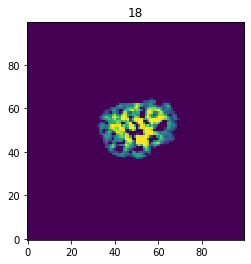

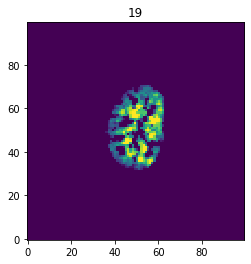

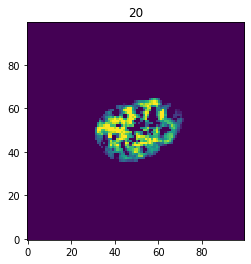

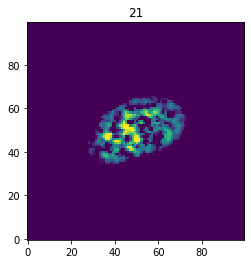

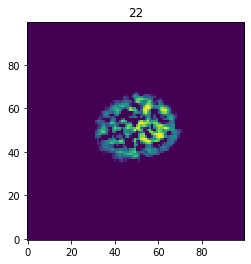

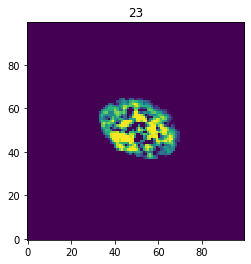

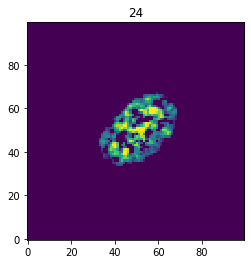

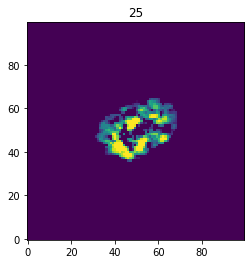

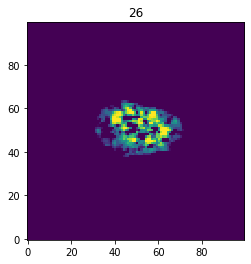

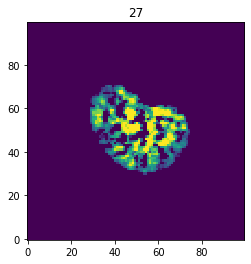

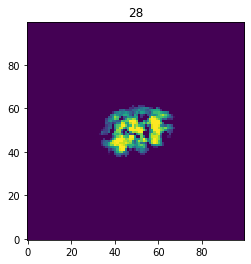

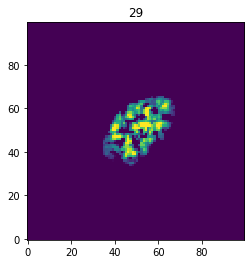

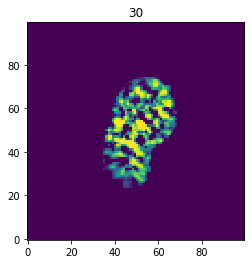

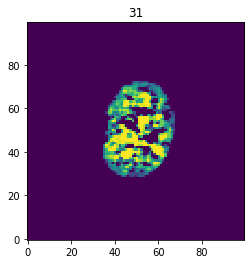

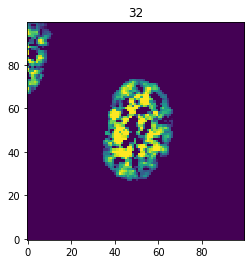

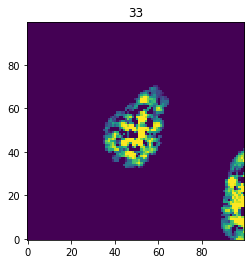

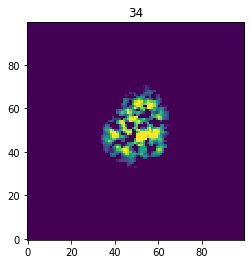

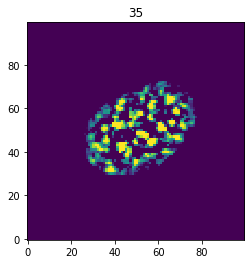

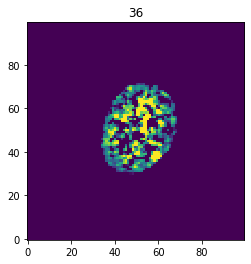

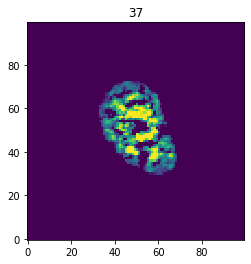

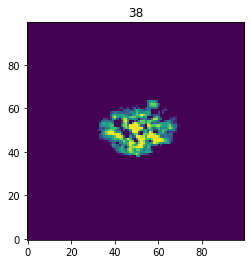

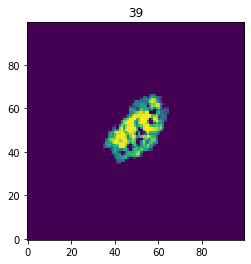

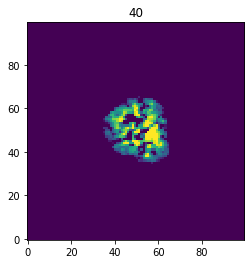

In [21]:
for n,_ in enumerate(res):
    best_layer = np.argmax(res[_]['weights'])
    plt.imshow(res[_]['data'][:,:, best_layer], origin='lower')
    plt.title(n)
    plt.show()

In [22]:
def _plot_scaled_cube(cube, level=None): # double slices through center
    
    if level is None:
        level = np.argmax(cube['weights'])
    
    # for whatever reason, to properly label extent with center_of_mass, we have to transpose
    extent = (cube['x0'][1]-cube['scale'][0]*np.shape(cube['data'])[1]/2.0,cube['x0'][1]+cube['scale'][0]*np.shape(cube['data'])[0]/2.0,
              cube['x0'][0]-cube['scale'][0]*np.shape(cube['data'])[0]/2.0,cube['x0'][0]+cube['scale'][0]*np.shape(cube['data'])[0]/2.0,
              )
    plt.imshow(cube['data'][:,:,level], extent=extent, origin='lower')
    plt.title((cube['x0'][1],cube['x0'][0]))
    plt.show()
    
    


extent: (-175.0, -75.0, -134.0, -34.0)


/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


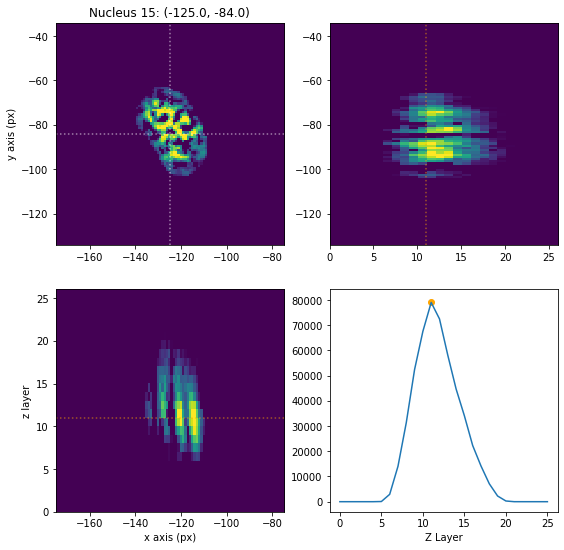

In [23]:
from scipy.spatial import ConvexHull
def plot_scaled_cube(cube, level=None, doSave=None, thickness=0.5): # double slices through center
    
    if level is None:
        level = np.argmax(cube['weights'])
    
    fig = plt.figure(figsize=(9,9))
    ax1 = fig.add_subplot(221)
    
    # for whatever reason, to properly label extent with center_of_mass, we have to transpose
    extent = (cube['x0'][1]-cube['scale'][0]*np.shape(cube['data'])[1]/2.0,cube['x0'][1]+cube['scale'][0]*np.shape(cube['data'])[0]/2.0,
              cube['x0'][0]-cube['scale'][0]*np.shape(cube['data'])[0]/2.0,cube['x0'][0]+cube['scale'][0]*np.shape(cube['data'])[0]/2.0,
              )
    ax1.imshow(cube['data'][:,:,level], extent=extent, origin='lower',aspect='auto')
    
    ax1.axhline(cube['x0'][0],color='white', alpha=0.5, linestyle=':')
    ax1.axvline(cube['x0'][1],color='white', alpha=0.5, linestyle=':')
    
    ax1.set_ylabel('y axis (px)')
    
    plt.title('Nucleus %d: ' % cube['n'] +str((cube['x0'][1],cube['x0'][0])))
    
    # for xy plot, we can just use ph=0, the first element
    if 'envelope' in cube and 'envelope_th' in cube:
#         envelopeT = cube['envelope'].transpose([1,0,2])
        applies = abs(cube['envelope'][:,:,2]-level)<thickness
        res = cube['envelope'][applies]
        
#         print(res)
#         plt.plot(res.T[1], res.T[0], color='red')
        
        hull = ConvexHull(res[:,0:2])
        for simplex in hull.simplices:
            ax1.plot(res[simplex, 1], res[simplex, 0], color='red')
        
    #         print(xy)
        if False: ax1.plot(xy.T[1], xy.T[0], color='red')
#         print(xy.T)
#         x= [cube['x0'][0]+r*np.cos(th) for r,th in zip(cube['envelope'][level],np.linspace(0,2*np.pi,101))]
#         y= [cube['x0'][1]+r*np.sin(th) for r,th in zip(cube['envelope'][level],np.linspace(0,2*np.pi,101))]
#         ax1.plot(y,x,color='red')
#         print(np.array([y,x]).T)
    
    print('extent:', extent)
    ax2 = fig.add_subplot(223, sharex=ax1)
    
    ax2.imshow(cube['data'][len(cube['data'])//2,:,:].T, extent=(extent[0], extent[1],0,cube['data'].shape[2]), aspect='auto', origin='lower')
    
    ax2.axhline(level,color='orange', alpha=0.5, linestyle=':')
    ax2.set_ylabel('z layer')
    ax2.set_xlabel('x axis (px)')
    
    if 'envelope' in cube and 'envelope_th' in cube:
        applies = abs(cube['envelope'][:,:,0]-cube['x0'][0])<thickness
        
        res = cube['envelope'][applies]
#         print(res)
#         plt.plot(res.T[1], res.T[0], color='red')
        
        hull = ConvexHull(res[:,[1,2]])
        for simplex in hull.simplices:
            ax2.plot(res[simplex, 1], res[simplex, 2], color='red')
    
    
    ax3 = fig.add_subplot(222, sharey=ax1)
    
    ax3.imshow(cube['data'][:,np.shape(cube['data'])[1]//2,:], extent=(0,cube['data'].shape[2],extent[2], extent[3]), aspect='auto')
    ax3.axvline(level,color='orange', alpha=0.5, linestyle=':')
    
    if 'envelope' in cube and 'envelope_th' in cube:
        applies = abs(cube['envelope'][:,:,1]-cube['x0'][1])<thickness
        
        res = cube['envelope'][applies]
#         print(res)
#         plt.plot(res.T[1], res.T[0], color='red')
        
        hull = ConvexHull(res[:,[0,2]])
        for simplex in hull.simplices:
            ax3.plot(res[simplex, 2], res[simplex, 0], color='red')

    ax4 = fig.add_subplot(224)
    ax4.plot(cube['weights'])
    ax4.set_xlabel('Z Layer')
#     ax4.text(level,cube['weights'][level],'o')
    ax4.scatter(level,cube['weights'][level],marker='o', color='orange')
    
    if doSave is not None:
        plt.savefig(doSave,dpi=300)
    fig.show()

if False:
    plot_scaled_cube(foo,level=10,thickness=0.5)
else:
    for r in [15,]: # in res
        plot_scaled_cube(res[r])
        plt.show()
        break

    

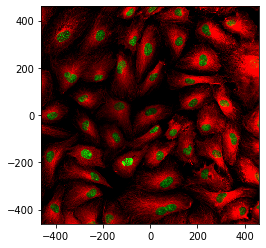

In [24]:
fmax = imageio.imread('HUVEC Tubulin AD 0.7_0002_decon_2_full.bmp')
extent = (0-1*np.shape(fmax)[0]/2.0,0+1*np.shape(fmax)[0]/2.0,
          0-1*np.shape(fmax)[1]/2.0,0+1*np.shape(fmax)[0]/2.0)

plt.imshow(fmax, origin='lower', extent=extent)

extent: (-133.0, -33.0, -223.0, -123.0)


/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


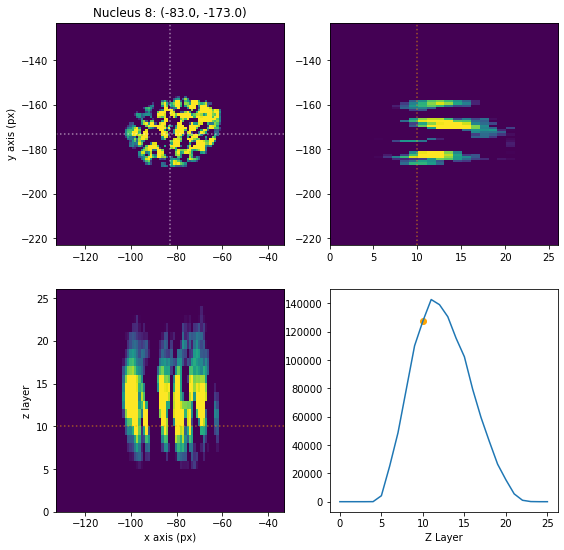

In [25]:
# 43 is a particuarly bad one
# plot_scaled_cube(res[0],10)
selected = 8 # 5
plot_scaled_cube(res[selected],10)
foo = res[selected]

In [26]:
print(foo.keys(), foo['data'].shape)
foo['x0']

dict_keys(['n', 'data', 'x0', 'centroid', 'scale', 'weights', 'extent', 'imextent', 'linear', 'linear3D']) (100, 100, 26)


[-173.0, -83.0, 11]

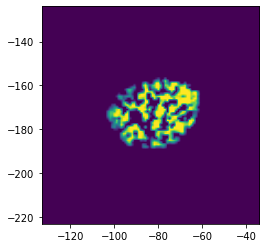

In [27]:
# Plotting interpolated data
indata = foo['linear'][10](
    np.linspace(foo['extent'][0],foo['extent'][1],1001),
    np.linspace(foo['extent'][2],foo['extent'][3],1001))
plt.imshow(indata, origin='lower', extent=foo['imextent'])
plt.show()

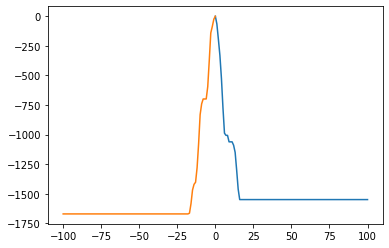

In [28]:
from itertools import accumulate

# Plotting radial slice of data
th0 = 3*np.pi/4.0
rspace = np.linspace(0,100,101)
radial_xy = np.array([(foo['x0'][0]+r*np.cos(th0), foo['x0'][1]+r*np.sin(th0)) for r in rspace])
indata = np.array([foo['linear'][10](*_)[0] for _ in radial_xy])
plt.plot(rspace,list(accumulate(-indata)))

rspace = np.linspace(0,-100,101)
radial_xy = np.array([(foo['x0'][0]+r*np.cos(th0), foo['x0'][1]+r*np.sin(th0)) for r in rspace])
indata = np.array([foo['linear'][10](*_)[0] for _ in radial_xy])
plt.plot(rspace, list(accumulate(-indata)))

# print(indata.shape)

extent: (-133.0, -33.0, -223.0, -123.0)


/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


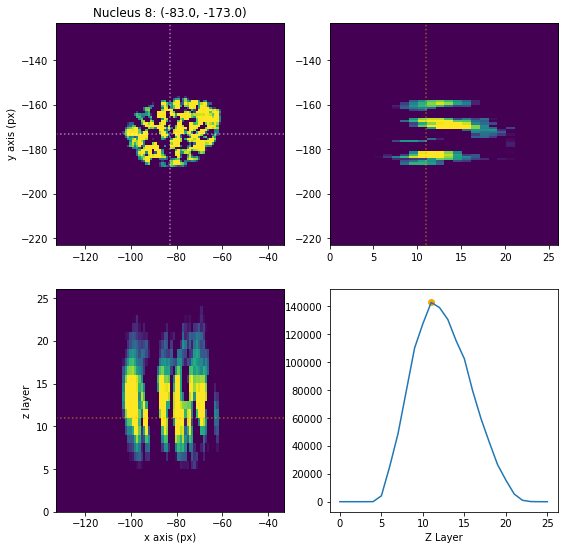

In [29]:
plot_scaled_cube(foo)

[-173.  -83.   11.]


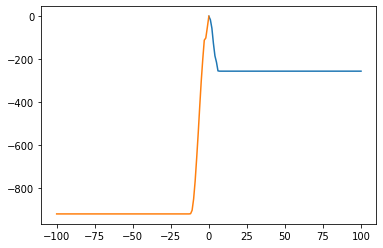

In [30]:
from itertools import accumulate

# Plotting radial slice of data
th0 = 3*np.pi/4.0
phi = np.pi*2*random()

rspace = np.linspace(0,100,101)

radial_xy = np.array([(
    foo['x0'][0]+r*np.cos(th0)*np.sin(phi), 
    foo['x0'][1]+r*np.sin(th0)*np.sin(phi),
    foo['x0'][2]+r*np.cos(phi),
    ) for r in rspace])
print(radial_xy[0])
indata = np.array([foo['linear3D'](_)[0] for _ in radial_xy])
plt.plot(rspace,list(accumulate(-indata)))

rspace = np.linspace(0,-100,101)
radial_xy = np.array([(
    foo['x0'][0]+r*np.cos(th0)*np.sin(phi), 
    foo['x0'][1]+r*np.sin(th0)*np.sin(phi),
    foo['x0'][2]+r*np.cos(phi),
    ) for r in rspace])

indata = np.array([foo['linear3D'](_)[0] for _ in radial_xy])
plt.plot(rspace, list(accumulate(-indata)))

# print(indata.shape)

100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


CPU times: user 5.11 s, sys: 246 ms, total: 5.35 s
Wall time: 5.18 s


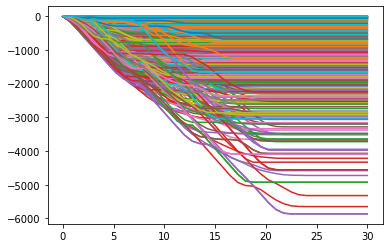

In [31]:
%%time
n_angle=20
n_r = 41
max_r = 30
envelope = np.zeros((n_angle,n_angle,3))
envelope_r = np.zeros((n_angle,n_angle))

rspace = np.linspace(0,max_r,n_r)

phi_space = np.linspace(0,2*np.pi,envelope.shape[0])
theta_space = np.linspace(0,2*np.pi,envelope.shape[1])



for i in tqdm(range(envelope.shape[0])):
    for j in range(envelope.shape[1]):
        phi = phi_space[i]
        th0 = theta_space[j]
        
        radial_xy = np.array([(
            foo['x0'][0]+r*np.cos(th0)*np.cos(phi), 
            foo['x0'][1]+r*np.sin(th0)*np.cos(phi),
            foo['x0'][2]+r*np.sin(phi),
            ) for r in rspace])
#         print(radial_xy[0])
        indata = np.array([foo['linear3D'](_)[0] for _ in radial_xy])
        plt.plot(rspace,list(accumulate(-indata)))
#         print('res:',radial_xy[np.argmin(list(accumulate(-indata)))])
        envelope[i,j] = (radial_xy[np.argmin(list(accumulate(-indata)))])
        
foo['envelope'] = envelope
foo['envelope_r'] = envelope_r
foo['envelope_th'] = theta_space
foo['envelope_ph'] = phi_space

In [32]:
# plt.plot(envelope)

In [33]:
envelope.shape, envelope.T.shape, np.transpose(envelope,[1,0,2]).shape

((20, 20, 3), (3, 20, 20), (20, 20, 3))

In [35]:
# list(filter(lambda x: abs(x[2]-10)<0.5,foo['envelope']))

In [36]:
envelopeT = np.transpose(envelope,[1,0,2])
envelopeT[abs(envelopeT[:,:,2]-10)<1]

array([[-159.5       ,  -83.        ,   11.        ],
       [-156.68465258,  -77.39893416,   11.        ],
       [-158.20361545,  -71.48351164,   11.        ],
       [-161.10387756,  -64.7916291 ,   11.        ],
       [-167.47657654,  -61.18849402,   11.        ],
       [-174.73416625,  -62.07172565,   11.        ],
       [-179.92924608,  -67.20291012,   11.        ],
       [-184.68310711,  -70.30876254,   11.        ],
       [-162.59025349,  -88.63347309,    9.02486492],
       [-173.32384706,  -82.82474273,    9.5458996 ],
       [-186.85171158,  -75.50382856,   11.        ],
       [-173.36320608,  -82.93939163,    9.5458996 ],
       [-188.53519053,  -80.4076352 ,   11.        ],
       [-172.87782039,  -82.97961183,    9.50512326],
       [-188.53519053,  -85.5923648 ,   11.        ],
       [-172.89106045,  -82.94104486,    9.50512326],
       [-184.87289564,  -89.42528981,   11.        ],
       [-172.9161058 ,  -82.9088666 ,    9.50512326],
       [-185.69902947,  -96.

In [37]:
envelope[:,:,[0,1]].shape

(20, 20, 2)

In [38]:
print(np.array(foo['x0']).shape, np.array([[foo['x0']]]).shape)
x0_repeats = np.repeat([[foo['x0']]],3,0).repeat(3,1)
x0_repeats.shape

(3,) (1, 1, 3)


(3, 3, 3)

In [39]:
%%time
n_angle=160
n_r = 101
max_r = 30
envelope = np.zeros((n_angle,n_angle,3))
envelope_r = np.zeros((n_angle,n_angle))

rspace = np.linspace(0,max_r,n_r)

phi_space = np.linspace(0,2*np.pi,envelope.shape[0])
theta_space = np.linspace(0,2*np.pi,envelope.shape[1])

for i,phi in tqdm(enumerate(phi_space)):
    
    x0_repeats = np.array([[foo['x0']]]).repeat(len(theta_space),1)
    x_nor = np.array([[[np.cos(th0)*np.cos(phi),
        np.sin(th0)*np.cos(phi),
        np.sin(phi)] for th0 in theta_space]])
    
#     radial_xy = x0_repeats+r
#     print(np.shape(x_nor), np.shape(x0_repeats), rspace.shape)
    
    r_repeats = np.expand_dims(np.expand_dims(rspace,1),1)
    radial_xy = x0_repeats + x_nor*r_repeats
#     print(np.shape(x_nor), np.shape(x0_repeats), r_repeats.shape, rspace.shape, radial_xy.shape)

    #     print(np.shape(r_repeats),radial_xy.shape)

#     break

#         print(radial_xy[0])
#     indata = np.array([foo['linear3D'](radial)[0] for _ in radial_xy])
    indata = foo['linear3D'](radial_xy)
    
#     plt.plot(rspace,list(accumulate(-indata)))
#         print('res:',radial_xy[np.argmin(list(accumulate(-indata)))])

    envelope[i] = np.array([radial_xy[arg,i,:] 
        for arg,i in zip(np.argmin(list(accumulate(-indata)),0), range(len(np.argmin(list(accumulate(-indata)),0))))])

    
    
    #     envelope_r[i] = rspace[np.argmin(list(accumulate(-indata)),0)]
        
foo['envelope'] = envelope
foo['envelope_r'] = envelope_r
foo['envelope_th'] = theta_space
foo['envelope_ph'] = phi_space

160it [00:00, 170.97it/s]

CPU times: user 1.8 s, sys: 33.2 ms, total: 1.84 s
Wall time: 938 ms


In [40]:
myargs = np.argmin(np.array(list(accumulate(-indata))),0)
radial_xy[myargs].shape, radial_xy.shape, myargs.shape

((160, 160, 3), (101, 160, 3), (160,))

In [43]:
radial_xy[np.argmin(list(accumulate(-indata)),0)][0].shape

(160, 3)

In [44]:
# %%time
n_angle=160
n_r = 101
max_r = 30
envelope = np.zeros((n_angle,n_angle,3))
envelope_r = np.zeros((n_angle,n_angle))

rspace = np.linspace(0,max_r,n_r)

phi_space = np.linspace(0,2*np.pi,envelope.shape[0])
theta_space = np.linspace(0,2*np.pi,envelope.shape[1])

def get90pct(x):
    x_min = np.repeat(np.expand_dims(np.min(x,0)*0.95,0),np.shape(x)[0],0)
    return np.argmin(x_min-x<0,0)

for i,phi in tqdm(enumerate(phi_space)):
    
    x0_repeats = np.array([[foo['x0']]]).repeat(len(theta_space),1)
    x_nor = np.array([[[np.cos(th0)*np.cos(phi),
        np.sin(th0)*np.cos(phi),
        np.sin(phi)] for th0 in theta_space]])
    
#     radial_xy = x0_repeats+r
#     print(np.shape(x_nor), np.shape(x0_repeats), rspace.shape)
    
    r_repeats = np.expand_dims(np.expand_dims(rspace,1),1)
    radial_xy = x0_repeats + x_nor*r_repeats
#     print(np.shape(x_nor), np.shape(x0_repeats), r_repeats.shape, rspace.shape, radial_xy.shape)

    #     print(np.shape(r_repeats),radial_xy.shape)

#     break

#         print(radial_xy[0])
#     indata = np.array([foo['linear3D'](radial)[0] for _ in radial_xy])
    indata = foo['linear3D'](radial_xy)
    
#     plt.plot(rspace,list(accumulate(-indata)))
#         print('res:',radial_xy[np.argmin(list(accumulate(-indata)))])

    envelope[i] = np.array([radial_xy[arg,i,:] 
        for arg,i in zip(get90pct(list(accumulate(-indata))), range(len(np.argmin(list(accumulate(-indata)),0))))])

    
    
    #     envelope_r[i] = rspace[np.argmin(list(accumulate(-indata)),0)]
        
foo['envelope'] = envelope
foo['envelope_r'] = envelope_r
foo['envelope_th'] = theta_space
foo['envelope_ph'] = phi_space

160it [00:00, 170.03it/s]


In [45]:
get90pct(np.array(list(accumulate(-indata))))

array([44, 47, 49, 50, 51, 51, 50, 47, 53, 55, 55, 53, 53, 53, 55, 56, 58,
       59, 59, 60, 64, 66, 66, 66, 65, 66, 67, 70, 73, 73, 72, 71, 70, 69,
       69, 67, 66, 66, 65, 63, 63, 63, 62, 63, 63, 62, 61, 60, 58, 55, 52,
       52, 53, 54, 55, 54, 51, 45, 43, 53, 55, 54, 54, 53, 52, 50, 49, 48,
       48, 50, 51, 51, 50, 49, 49, 49, 49, 50, 50, 50, 50, 49, 50, 51, 52,
       52, 52, 52, 50, 45, 43, 42, 43, 44, 46, 58, 58, 58, 57, 58, 58, 59,
       58, 57, 57, 57, 56, 56, 57, 60, 61, 63, 62, 61, 60, 62, 64, 65, 66,
       66, 66, 66, 64, 62, 61, 59, 44, 45, 46, 48, 54, 57, 56, 54, 49, 47,
       47, 51, 53, 53, 51, 50, 49, 48, 47, 38, 35, 35, 35, 37, 42, 46, 48,
       48, 48, 46, 45, 44, 44, 44])

In [46]:
np.argmin(np.array(list(accumulate(-indata))),0)

array([46, 53, 56, 57, 57, 57, 56, 55, 59, 60, 60, 58, 58, 57, 58, 60, 61,
       63, 66, 68, 71, 72, 72, 75, 73, 72, 77, 76, 81, 80, 79, 77, 76, 76,
       75, 74, 74, 70, 70, 70, 70, 70, 70, 67, 67, 68, 68, 66, 63, 64, 59,
       59, 60, 59, 59, 58, 55, 55, 57, 59, 60, 59, 60, 58, 57, 55, 54, 53,
       53, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 54,
       54, 55, 55, 56, 54, 49, 45, 45, 46, 59, 61, 62, 62, 62, 65, 64, 65,
       64, 62, 64, 63, 61, 60, 62, 65, 65, 70, 69, 65, 64, 67, 70, 70, 70,
       73, 73, 70, 70, 67, 67, 68, 63, 48, 53, 57, 62, 63, 62, 62, 60, 53,
       54, 56, 58, 56, 54, 56, 55, 53, 53, 54, 53, 52, 39, 43, 47, 52, 51,
       51, 50, 50, 46, 46, 46, 46])

In [47]:
np.min(np.array(list(accumulate(-indata))),0).shape

(160,)

## Maximum projection, for initial segmentation

26


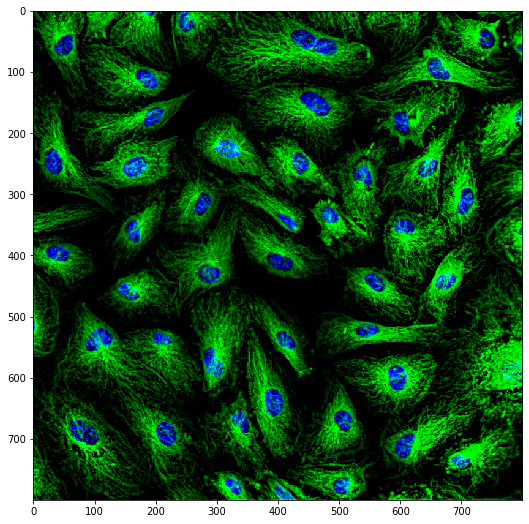

In [49]:
filedir = 'HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/'
destdir = 'HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
filedesc = 'HUVEC Tubulin AD 0.7 ZStack Decon cellSens'
filen = glob.glob(os.path.join(filedir,'Intensity*.png'))
print(len(filen))

fig = plt.figure(figsize=(9,9))
cumulative = np.max(np.array([imageio.imread(_) for _ in filen]),axis=0)
plt.imshow(cumulative)
plt.imsave(os.path.join(destdir,filedesc+'_max.png'),cumulative)
plt.show()

## Estimate Cytoplasm

41
(800, 800)


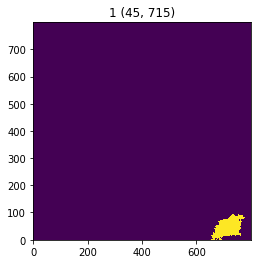

(800, 800)


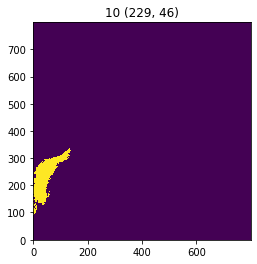

(800, 800)


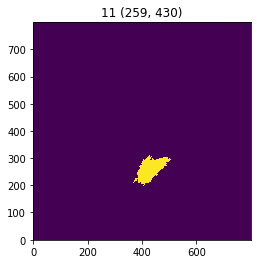

(800, 800)


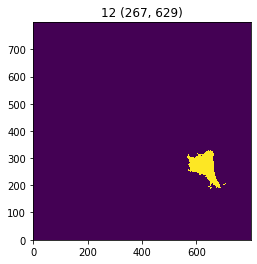

(800, 800)


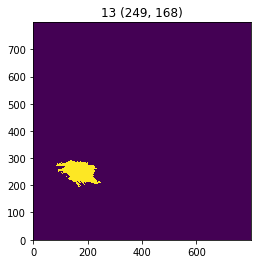

(800, 800)


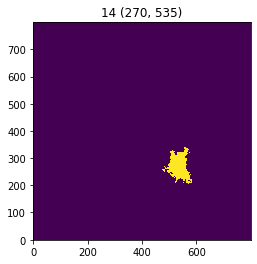

(800, 800)


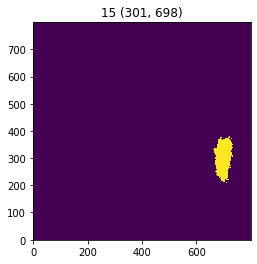

(800, 800)


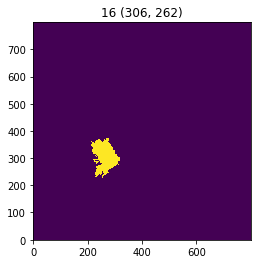

(800, 800)


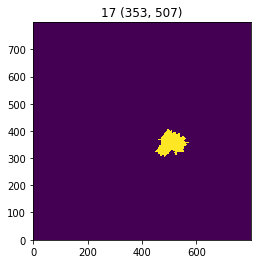

(800, 800)


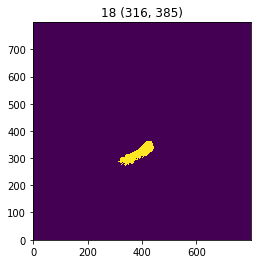

(800, 800)


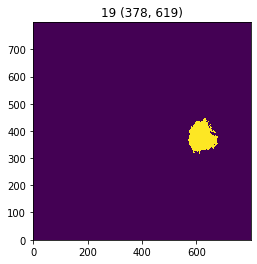

(800, 800)


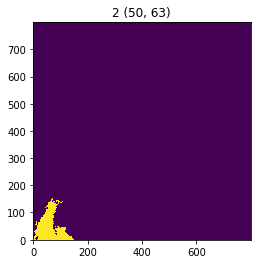

(800, 800)


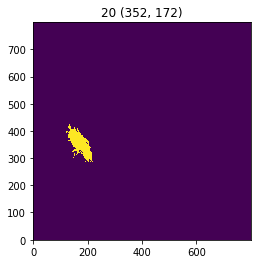

(800, 800)


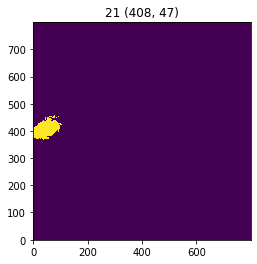

(800, 800)


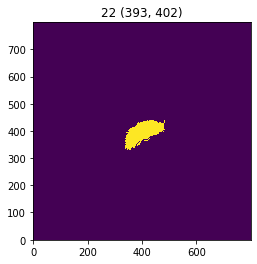

(800, 800)


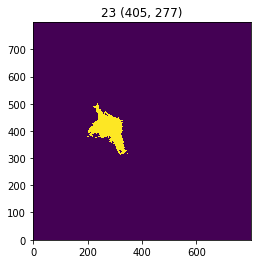

(800, 800)


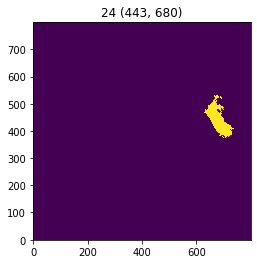

(800, 800)


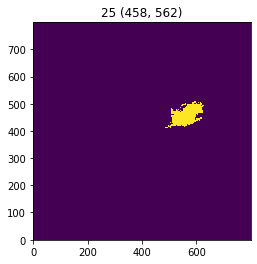

(800, 800)


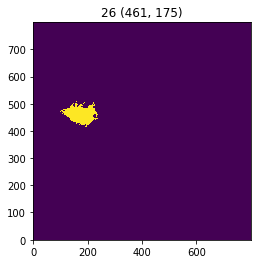

(800, 800)


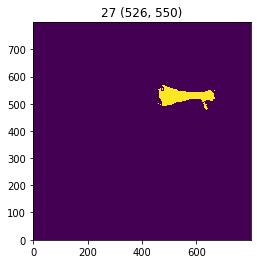

(800, 800)


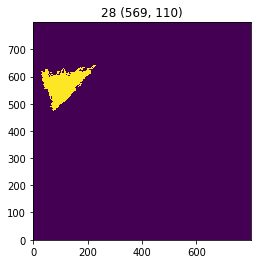

(800, 800)


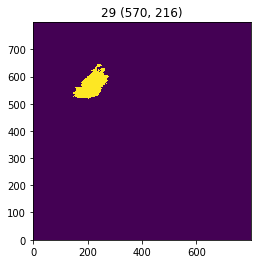

(800, 800)


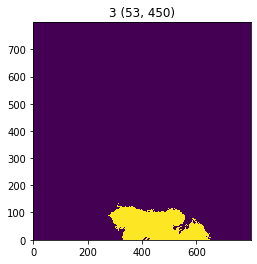

(800, 800)


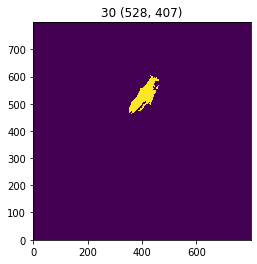

(800, 800)


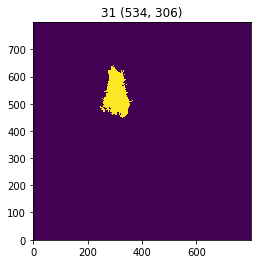

(800, 800)


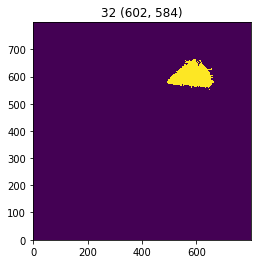

(800, 800)


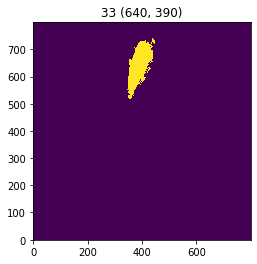

(800, 800)


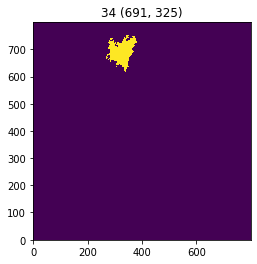

(800, 800)


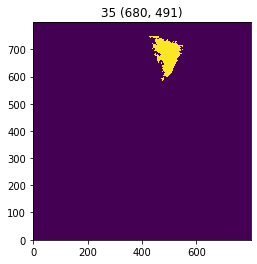

(800, 800)


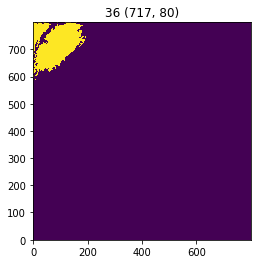

(800, 800)


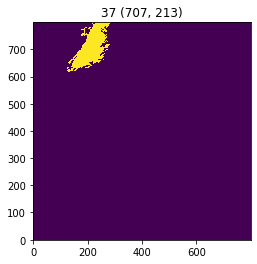

(800, 800)


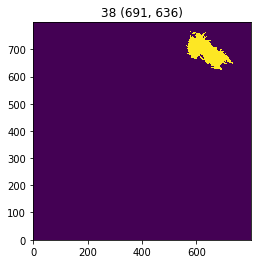

(800, 800)


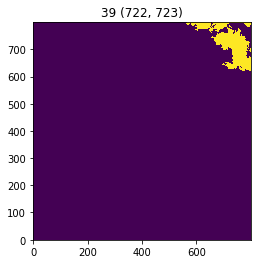

(800, 800)


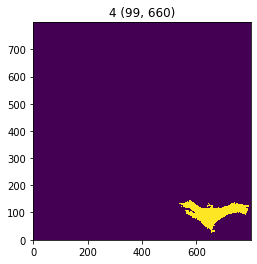

(800, 800)


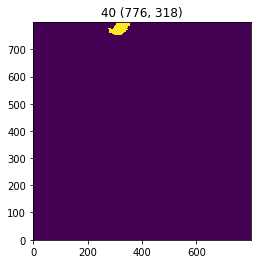

(800, 800)


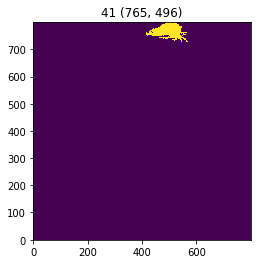

(800, 800)


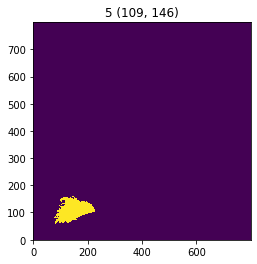

(800, 800)


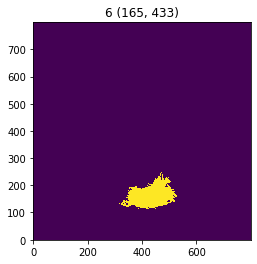

(800, 800)


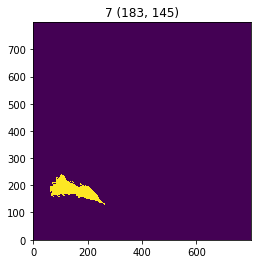

(800, 800)


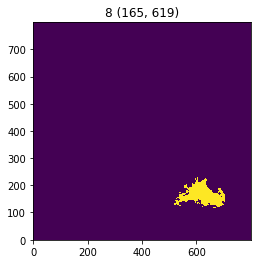

(800, 800)


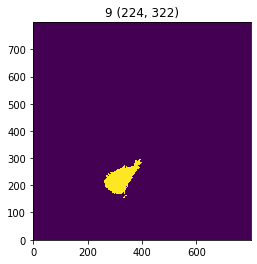

In [79]:
from skimage.measure import find_contours
filen_cyto = glob.glob('../results/objects/Cytoplasm_*.png')
print(len(filen_masks))

obj_cyto = {}
for f in sorted(filen_cyto):
    obj_n = int(f.split('_')[-1].split('.')[0])
    foo = imageio.imread(f)
    print(np.shape(foo))
    plt.imshow(foo[:,:], origin='lower')
    
#     contours = find_contours(foo[:,:], 254)
#     print('len contours',len(contours))
#     for ff in foo:
#         print(ff)
    # Display the image and plot all contours found


#     for n, contour in enumerate(contours):
#         plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
#         break

    
    
    
    obj_cyto[obj_n] = foo
    cx, cy = center_of_mass(foo)
    plt.title(str(obj_n) + ' (%d, %d)' % (int(cx), int(cy)))
    plt.show()    
#     break

In [55]:
obj_cyto.keys()

dict_keys([1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 5, 6, 7, 8, 9])

301 698


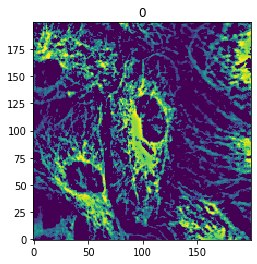

301 698


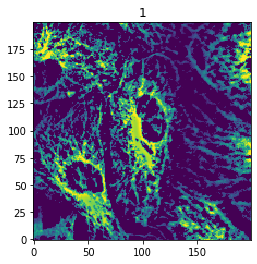

301 698


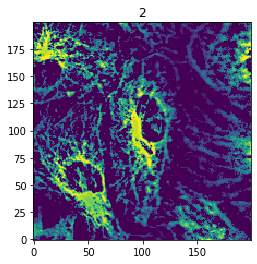

301 698


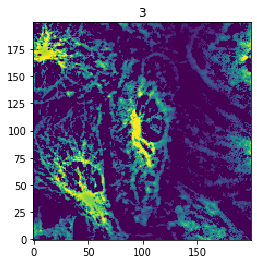

301 698


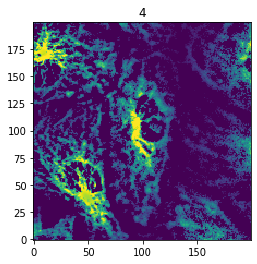

301 698


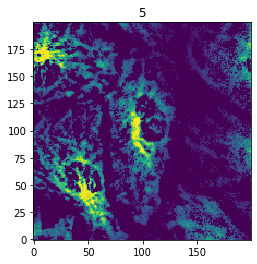

301 698


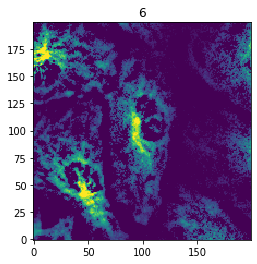

301 698


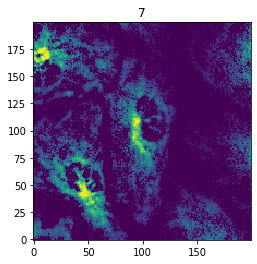

301 698


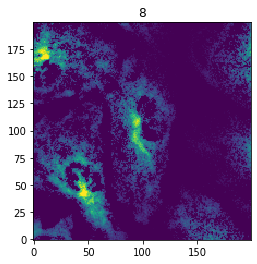

301 698


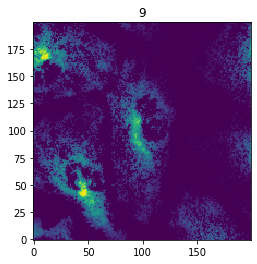

301 698


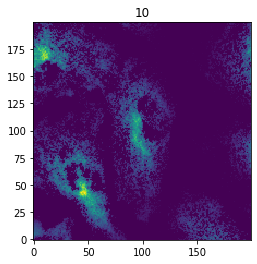

301 698


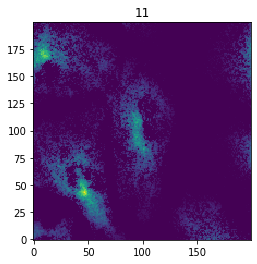

301 698


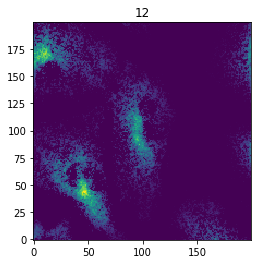

301 698


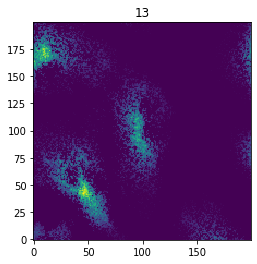

301 698


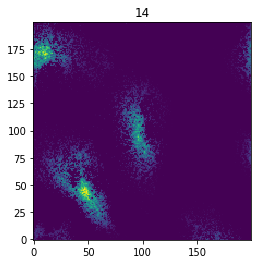

301 698


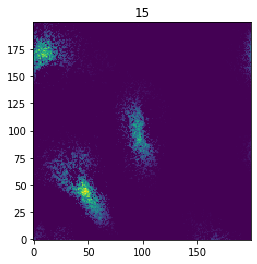

301 698


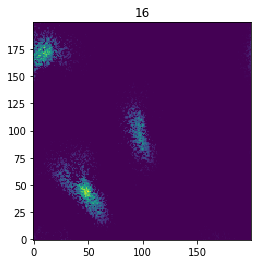

301 698


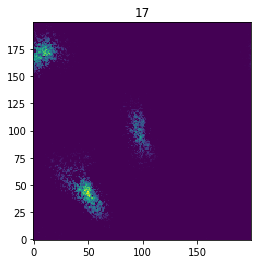

301 698


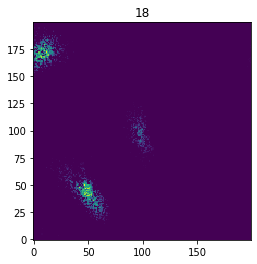

301 698


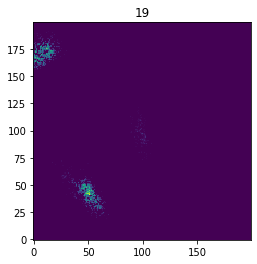

301 698


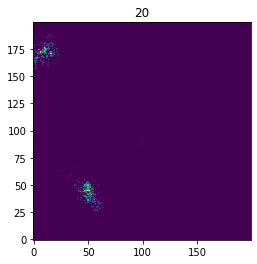

301 698


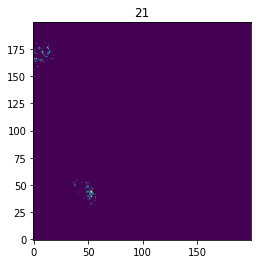

301 698


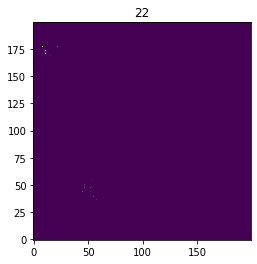

301 698


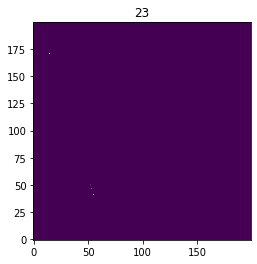

301 698


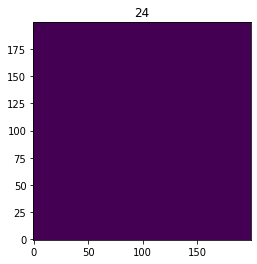

301 698


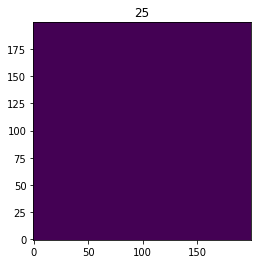

In [80]:
# plt.imshow(obj_masks[5]*all_orig[5])


center_of_mass(obj_cyto[5])
def do_crop(img, mask, centroid=None, edge=10):
    if centroid is None:
        cx, cy = center_of_mass(mask)
        cx = int(cx)
        cy = int(cy)
        print(cx,cy)
    return img[cx-edge//2:cx+edge//2,cy-edge//2:cy+edge//2]

cropped_stack = []
selected_n = 15
obj_cytoplasm = obj_cyto[selected_n]
obj_nucleus = obj_masks[selected_n]
for n in range(len(all_orig_cyto)):
    

    contours = find_contours(obj_cytoplasm, 254)
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')
        break

    this_layer = do_crop(all_orig_cyto[n+1],obj_cyto[15], edge=200) # 15th cell, all Z levels
    cropped_stack.append(this_layer)
    plt.imshow(this_layer, origin='lower')
    plt.title(n)
    plt.show()
cropped_stack = np.log10(np.array(cropped_stack).transpose(1,2,0)+1e-4)
    


In [959]:
class confocalObject(object):
    
    def __init__(self, quiet=False):
        
        self.data = {}
        self.quiet = quiet
    
    # filen to provide file list manually
    # globular to use glob.glob
    # ex_re are a list of regex used to extract metadata from the filenames (and the metadata target names)
    def load_images(self, target, filen=None, globular=None, index_re='\d+', third_index='auto'):
        if globular is not None:
            filen = glob.glob(globular)
        
        if not self.quiet: print('Found %d files, ie:' % len(filen), filen[0])
        
        # produce indices, and 
        filen, indices = self.sort_files(filen, index_re)
        
        if not self.quiet: print('Results: %d files w/ indices:' % len(filen), indices)
        
        if type(third_index) == int:
            self.data[target] = {index: imageio.imread(_)[:,:,third_index] for _,index in zip(filen, indices)}
        else:
            self.data[target] = {index: imageio.imread(_)[:,:] for _,index in zip(filen, indices)}
        
        # todo in this section:
        # load images in a way that allows us to associate them with an index. That's a good start
        
    # useful helper function for load_images
    def sort_files(self, filen, index_re):
    
        regex = re.compile(index_re)
        
        filen = sorted(filen, key=lambda x: int(regex.search(x.split('/')[-1]).group(0)))
        indices = map(lambda x: int(regex.search(x.split('/')[-1]).group(0)), filen)
        
        return filen, list(indices)
    
    def make_interp2D(self, target, result_tag=None, color=None):
        
        if result_tag is None:
            result_tag = target + '_linear2D'
            
        def create_interp(data):
            x = np.arange(data.shape[0])
            y = np.arange(data.shape[1])
            
            xx, yy = np.meshgrid(x, y) # not used?
            extent = (x[0],x[-1],y[0],y[-1])
            
            return {
                'count': [len(x), len(y)],
                'extent': extent, 
                'fxn': RegularGridInterpolator((x,y), data, bounds_error=False, fill_value=-1, method='linear')
            }

        
        if color is None:
            self.data[result_tag] = {idx: create_interp(self.data[target][idx]) for idx in self.data[target]}
        else:
            self.data[result_tag] = {idx: create_interp(self.data[target][idx][:,:,color]) for idx in self.data[target]}
    
    def make_interp3D(self, target, result_tag, color=None):

        if result_tag is None:
            result_tag = target + '_linear'
            
        def create_interp(data):
            # 3D interpolation must be regular grid. Ignore crazy Z extents
            indices = sorted(self.data[target].keys())
            if color is not None:
                data = np.array([self.data[target][_][:,:,color] for _ in indices]).transpose([1,2,0])
            else:
                data = np.array([self.data[target][_][:,:] for _ in indices]).transpose([1,2,0])
                
            x = np.arange(data.shape[0])
            y = np.arange(data.shape[1])
            z = np.linspace(np.min(indices), np.max(indices), len(indices)) # assumed!
            
            xx, yy = np.meshgrid(x, y) # not used?
            extent = (x[0],x[-1],y[0],y[-1], z[0], z[-1])
      
            return {
                'count': [len(x), len(y), len(z)],
                'extent': extent, 
                'fxn': RegularGridInterpolator((x,y,z), data, bounds_error=False, fill_value=0, method='linear')
            }

        
        if color is None:
            self.data[result_tag] = create_interp(self.data[target])
        else:
            self.data[result_tag] = create_interp(self.data[target])
    
    # Creates a cropped dataset in a new target name.
    def create_cropped(self, target, series=True, cropped_name=None, x0=None, window=None, debug=False):
        
        def do_crop(item):
            print('item:', item)
            dims = len(item['extent'])//2
            print('dims:', dims)
            
            if dims==2:
                x = np.linspace(item['extent'][0],item['extent'][1],item['count'][0])
                y = np.linspace(item['extent'][2],item['extent'][3],item['count'][1])
                
                x = x[(x >= window[0]) & (x<= window[1])]
                y = y[(y >= window[2]) & (y<= window[3])]
                
                xx,yy=np.expand_dims(x,0),np.expand_dims(y,0)

                data = item['fxn']((xx,yy))
                if debug: print('New item has extent:', window)
                     
                return {
                    'count': [len(x), len(y)],
                    'extent': window, 
                    'fxn': RegularGridInterpolator((x,y), data, bounds_error=False, fill_value=0, method='linear')
                }
            
            elif dims==3:
                x = np.linspace(item['extent'][0],item['extent'][1],item['count'][0])
                y = np.linspace(item['extent'][2],item['extent'][3],item['count'][1])
                z = np.linspace(item['extent'][4],item['extent'][5],item['count'][2])
                
                x = x[(x >= window[0]) & (x<= window[1])]
                y = y[(y >= window[2]) & (y<= window[3])]
                if len(window)>4: z = z[(z >= window[4]) & (z<= window[5])]
                

                xx,yy,zz=np.reshape(x,[-1,1,1]),np.reshape(y,[1,-1,1]),np.reshape(z,[1,1,-1])
                data = item['fxn']((xx,yy,zz))
                
                if debug:
                    print(xx.shape, yy.shape, zz.shape)
                    print(item['fxn']((x[0],y[0],z[0])))
                    print('New 3D item has extent:', window, 'counts:', [len(x), len(y), len(z)],)
                    print('z was:', z, item['count'][2])
                
                return {
                    'count': [len(x), len(y), len(z)],
                    'extent': window, 
                    'fxn': RegularGridInterpolator((x,y,z), data, bounds_error=False, fill_value=0, method='linear')
                }

            else:
                raise Exception('wrong number of dims in cropped data', dims==2, dims==3, dims)
            
        
        data = self.data[target]
        print('data keys:', data.keys())
        
        if series:
            print('series')
            self.data[cropped_name] = {idx: do_crop(data[idx]) for idx in data}
        else:
            print('non-series')
            self.data[cropped_name] = do_crop(data)
            
    def render_image(self,target=None, data=None, do_plot=False, upscale=1, sliced=None, style='XY'):
        
        if target is not None:
            data = self.data[target]
        
        if style=='XY':
            px = np.expand_dims(np.linspace(data['extent'][0],data['extent'][1],data['count'][0]*upscale),0)
            py = np.expand_dims(np.linspace(data['extent'][2],data['extent'][3],data['count'][1]*upscale),1)
            rendered = data['fxn']((px,py)) if sliced is None else data['fxn']((px,py, sliced))
        if style=='XZ':
            px = np.expand_dims(np.linspace(data['extent'][0],data['extent'][1],data['count'][0]*upscale),0)
            pz = np.expand_dims(np.linspace(data['extent'][4],data['extent'][5],data['count'][2]*upscale),1)
#             print('px', px, 'sliced at y:', sliced)
            rendered = data['fxn']((px, sliced, pz))
        if style=='YZ':
            py = np.expand_dims(np.linspace(data['extent'][2],data['extent'][3],data['count'][1]*upscale),0)
            pz = np.expand_dims(np.linspace(data['extent'][4],data['extent'][5],data['count'][2]*upscale),1)
#             print('py', py, 'sliced at x:', sliced)
            rendered = data['fxn']((sliced,py, pz))
        
            
        if do_plot:
            plt.imshow(rendered,origin='lower', extent=data['extent'][0:4])
        
        return rendered
    
    # Currently not tested for 2D
    def get_weights(self, target):
        
        data = self.data[target]
        if 'fxn' in data: # 3D
            
            levels = np.linspace(data['extent'][4],data['extent'][5], data['count'][2])
            weights = [np.sum(np.array(self.render_image(target=target, sliced=level)))
                for level in levels]
            
            return levels, weights
        else:
            levels = sorted(data.keys())
            weights = [np.sum(np.array(self.render_image(data=data[level])))
                for level in levels]
            
    # Works for 3D only at the moment
    def getCoM(self, target):
        
        z, w = self.get_weights(target)
        print('Weights:', z,w)
        x0z = z[np.argmax(w)]
        print('x0z:', x0z)
        max_slice = self.render_image(target,sliced=x0z)
        cx, cy = center_of_mass(max_slice)
        print('but we need to adjust for extent')
        px = np.linspace(data['extent'][0],data['extent'][1],data['count'][0])
        py = np.linspace(data['extent'][2],data['extent'][3],data['count'][1])
        
        # have to interpolate center of mass cx, cy using px, py
        
        cx,cy = cx+self.data['target']['extent'][0],cy+self.data['target']['extent'][2]
        
        return (x0z, cx, cy)

    def find_envelope3D(self, target, n_angle=20, n_r=41, max_r=30, ):
        
        x0 = self.getCoM(target)
        
        
        envelope = np.zeros((n_angle,n_angle,3))
        envelope_r = np.zeros((n_angle,n_angle))

        rspace = np.linspace(0,max_r,n_r)

        phi_space = np.linspace(0,2*np.pi,envelope.shape[0])
        theta_space = np.linspace(0,2*np.pi,envelope.shape[1])

        for i in tqdm(range(envelope.shape[0])):
            for j in range(envelope.shape[1]):
                phi = phi_space[i]
                th0 = theta_space[j]

                radial_xy = np.array([(
                    foo['x0'][0]+r*np.cos(th0)*np.cos(phi), 
                    foo['x0'][1]+r*np.sin(th0)*np.cos(phi),
                    foo['x0'][2]+r*np.sin(phi),
                    ) for r in rspace])
        #         print(radial_xy[0])
                indata = np.array([foo['linear3D'](_)[0] for _ in radial_xy])
                plt.plot(rspace,list(accumulate(-indata)))
        #         print('res:',radial_xy[np.argmin(list(accumulate(-indata)))])
                envelope[i,j] = (radial_xy[np.argmin(list(accumulate(-indata)))])

        foo['envelope'] = envelope
        foo['envelope_r'] = envelope_r
        foo['envelope_th'] = theta_space
        foo['envelope_ph'] = phi_space
            
    
    def four_panel(self, target, do_plot=True, upscale=1, z=None, debug=False, slices=None, desc=''):
        
        wx, wy = self.get_weights(target)
        idx = int(np.where(wx==z)[0])
         
        extent = self.data[target]['extent']
        fig = plt.figure(figsize=(9,9))
        ax1 = fig.add_subplot(221)

        if slices is None:
            slice_xy, slice_yz, slice_xz = None,None,None

        slice_xy = z if z is not None else idx # 10 # FIXME
        data_ax1 = self.render_image(target, sliced=slice_xy, upscale=upscale, do_plot=False)
        
        extent_xy = self.data[target]['extent'][0:4]
        print('showing extent:', extent)
              
        ax1.imshow(data_ax1, extent=extent_xy, origin='lower',aspect='auto')


        x0 = (np.mean(extent[0:2]), np.mean(extent[2:4]),np.mean(extent[4:6]))
        print('extent:', extent,x0)        
        ax1.axhline(y=x0[1],color='white', alpha=0.5, linestyle=':')
        ax1.axvline(x=x0[0],color='white', alpha=0.5, linestyle=':')

        ax1.set_ylabel('y axis (px)')

        plt.title(desc +' ' + str(x0))

        # XZ

        ax2 = fig.add_subplot(223, sharex=ax1)

        extent_xz = [extent[0], extent[1], extent[4], extent[5]]
#             print('extent_xz:', extent_xz)
        slice_xz = np.mean(extent[2:4])
        data_ax2 = self.render_image(target, sliced=slice_xz, style='XZ', upscale=upscale, do_plot=False)

        ax2.imshow(data_ax2, extent=extent_xz, origin='lower',aspect='auto')

        ax2.axhline(slice_xy,color='orange', alpha=0.5, linestyle=':')
        ax2.set_ylabel('z layer')
        ax2.set_xlabel('x axis (px)')


        ax3 = fig.add_subplot(222, sharey=ax1)

        extent_yz = [extent[4], extent[5], extent[2], extent[3]]
#             print('extent_yz:', extent_yz)
        slice_yz = np.mean(extent[0:2])

        data_ax3 = self.render_image(target, sliced=slice_yz, style='YZ', upscale=upscale, do_plot=False)

        ax3.imshow(data_ax3, extent=extent_yz, origin='lower',aspect='auto')

        ax3.axvline(slice_xy,color='orange', alpha=0.5, linestyle=':')

        ax3.set_xlabel('z layer')

        ax4 = fig.add_subplot(224)
        
        wx, wy = cellSens1.get_weights(target)
        idx = int(np.where(wx==z)[0])
 
        ax4.set_xlabel('Z Layer') 
        ax4.scatter(z,wy[idx],marker='o', color='orange')
        ax4.axvline(z,color='orange', alpha=0.5, linestyle=':')
        ax4.set_yticklabels([])
        ax4.set_ylabel('image material (arb)')
        

#         if doSave is not None:
#             plt.savefig(doSave,dpi=300)
#         fig.show()

        ax4.plot(wx, wy)

In [960]:
cellSens1 = confocalObject(quiet=True)
cellSens1.load_images(
    target='full_image',
    globular='HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/Intensity*.png',
)
cellSens1.load_images(
    target='nucleus_mask',
    globular='../results/objects/Nucleus*.png',
)
cellSens1.load_images(
    target='cyto_mask',
    globular='../results/objects/Cytoplasm_*.png',
)

In [961]:
cellSens1.make_interp2D('full_image', 'blue_linear2D',2) # nucleus
cellSens1.make_interp2D('full_image', 'green_linear2D',1) # cyto
cellSens1.make_interp2D('full_image', 'red_linear2D',0) # unused

cellSens1.make_interp2D('nucleus_mask', 'nucleus_linear2D',None) # unused
cellSens1.make_interp2D('cyto_mask', 'cyto_linear2D',None) # unused

cellSens1.make_interp3D('full_image', 'blue_linear3D',2) # nucleus 3D

print(cellSens1.data.keys())

dict_keys(['full_image', 'nucleus_mask', 'cyto_mask', 'blue_linear2D', 'green_linear2D', 'red_linear2D', 'nucleus_linear2D', 'cyto_linear2D', 'blue_linear3D'])


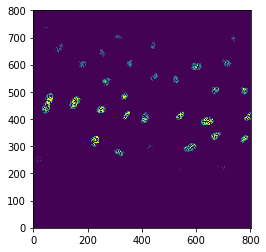

In [962]:
cellSens1.data['blue_linear2D'][10]['fxn']((10,10))
px = np.expand_dims(np.linspace(0,800,801),0)
py = np.expand_dims(np.linspace(0,800,801),1)
plt.imshow(cellSens1.data['blue_linear2D'][10]['fxn']((px,py)), origin='lower')

(0, 799, 0, 799, 1.0, 26.0)


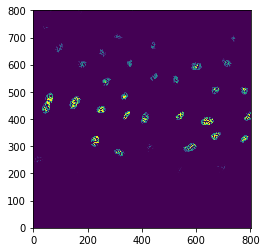

In [963]:
plt.imshow(cellSens1.data['blue_linear3D']['fxn']((px,py,10)), origin='lower')
plt.imshow(cellSens1.data['blue_linear3D']['fxn']((px,py,10)), origin='lower')
print(cellSens1.data['blue_linear3D']['extent'])

In [964]:
cellSens1.create_cropped('blue_linear3D',cropped_name='blue_cropped3D', series=False,
                window=(360,460,350,450,1,20), debug=True)

data keys: dict_keys(['count', 'extent', 'fxn'])
non-series
item: {'count': [800, 800, 26], 'extent': (0, 799, 0, 799, 1.0, 26.0), 'fxn': <scipy.interpolate.interpolate.RegularGridInterpolator object at 0x7fcd7ffb2810>}
dims: 3
(101, 1, 1) (1, 101, 1) (1, 1, 20)
0.0
New 3D item has extent: (360, 460, 350, 450, 1, 20) counts: [101, 101, 20]
z was: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.] 26


showing extent: (360, 460, 350, 450, 1, 20)
extent: (360, 460, 350, 450, 1, 20) (410.0, 400.0, 10.5)


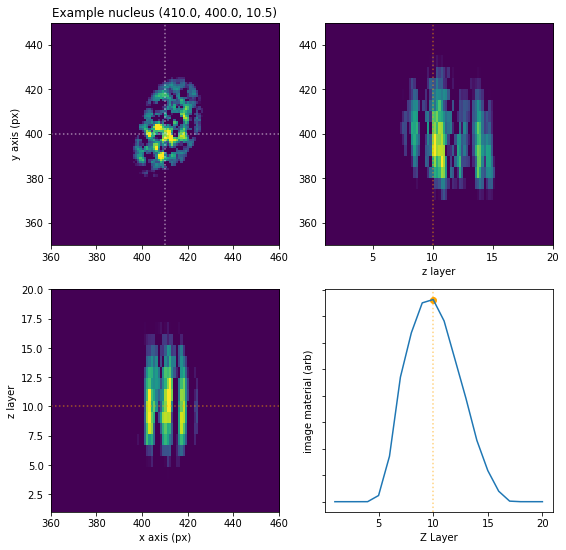

In [965]:
cellSens1.four_panel('blue_cropped3D', debug=True, upscale=1, desc='Example nucleus', z=10)